# Data Acquisition
* This file is being used to find an appropriate data source
* Initial exploration of data from multiple sources

# Import Helper Modules

In [1]:
# importing sys
import sys

# adding 00_helper_files to the system path
sys.path.insert(0, '/Users/qmcbt/codeup-data-science/00_helper_files')

# Import Helper Modules
import QMCBT_00_quicktips as qt
import QMCBT_01_acquire as acq
import QMCBT_02_prepare as prep
import QMCBT_03_explore as exp
import QMCBT_04_visualize as viz
import QMCBT_05_model as mod
import QMCBT_wrangle as w

**CUSTOM EXPLORATION FUNCTIONS
nunique_column_all(df): PRINT NUNIQUE OF ALL COLUMNS
nunique_column_objects(df): PRINT NUNIQUE OF COLUMNS THAT ARE OBJECTS
nunique_column_qty(df): PRINT NUNIQUE OF COLUMNS THAT ARE *NOT* OBJECTS
numeric_range(df): COMPUTE RANGE FOR ALL NUMERIC VARIABLES

**USEFUL EXPLORATORY CODE**
DFNAME.head()
DFNAME.shape
DFNAME.shape[0] #read row count
DFNAME.describe().T
DFNAME.columns.to_list()
DFNAME.COLUMNNAME.value_counts(dropna=False)
DFNAME.dtypes
DFNAME.select_dtypes(include='object').columns
DFNAME.select_dtypes(include='float').columns
pd.crosstab(DFNAME.COLUMN-1, DFNAME.COLUMN-2)


In [2]:
url="https://upload.wikimedia.org/wikipedia/en/thumb/1/15/The_Elder_Scrolls_V_Skyrim_cover.png/220px-The_Elder_Scrolls_V_Skyrim_cover.png"
pic1 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFRgVFRYYGRgaGhwcGhoaGhkaGBwcGhoZHBgcGhocIS4lHB4rHxgcJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHjQrISs0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NP/AABEIALEBHAMBIgACEQEDEQH/xAAcAAEAAgMBAQEAAAAAAAAAAAAEAwUAAgYHAQj/xABDEAACAQMCBAMFBAcHAgcBAAABAhEAAyESMQQFQVEiYXEGEzKBkUKhsdEUI1JicsHwBzOCkrLh8VPCFUNzg6KjszT/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/xAAjEQEBAAICAwEAAgMBAAAAAAAAAQIRITEDEkEEE1EiYXEF/9oADAMBAAIRAxEAPwCgQUm2ta21pNtajTe2lKtpWltaVbSg3tpSraVpbSlW0ordEpKJWttKVbSiK/nyH9Fvkf8ASf8A0GvBuEtydpiv0df4YOjodmVlPzBH868N9nuXy7o3xKSpHmCQfwqxnJS31jIEfjWluZnbuf8Aiuj5nwGhpwAO+59J6VTOUzOTnvH0rTO/j0f2F9vNGjh+KbUmy3TuvYOTuPOvWrYDAEEEHIIyCPWvyuWAyB+Y8xXW+x/txf4NgrMXs/aRjJA7ofsny2qWNY5a7e/aayKByjndnibYuW2lYBM7iRMEdKlu8wRcapPYb1lsqsoVnmVtl1A4HmOonEb718sc1tOxVGkqYI7UDqyoRxK9D+Vff0lRvt36UEsVmmjW+PRm0g+KJjyqLjObWrZ8TDpJ6Ce9Aw26FzTjrXD22uXnCIoyT+A7nyrd+a2ghfWNIEz+XevCfbn2mucTeZGPgVmCrEAZwfMx1pJtMrpH7Ze1r8c8CUsr8CTk/vN0LfhXNIuJG+0dvuqS3Zkz9eg8qYlliPCNt8Z9Z7V0crWnAcGWYDEnvmrzmvAheHwpBHXoR5VvyHh3L/Ac42q+9rbDpwkMBOPxrNvKycWr72RsBeCsQN0n5mSfxqyupW/JOFKcNZQ7rbUH1gTUt1Ky6RV3Eo1xKsbiUW4lFV1xKK6VY3EolxaCvdahK0y4tQFaIy2tKtrUVtaVbWgmtpS7aVDbWl21oqW2lKtpUdtaXbSiN0SlW0rS2tKtrRUltK8ns8KbXNuItxAZ2ceYcBpH+Y169bSuQ9vOWBHscaogo4t3CP2G+En0bH+KkTL+3n3tlw+m62+kY6z8prnVGPhx5xXpftJZV1GsZJ8JUb/SuM4qwsles9IjHeBmtTpyymqoWXSD1BPbw1rY4ZnfQsSdpOPrVp/4W7TCMU3LKrEDvgflU5U2RFt0urPUZGM7+Jdq0Or9l+JTgxDXDLL41E6WIjTE7EGRHapr/MrruynUhYaWwTIGTpj5j5Vx9li5GswIdVEmSVGVM7HIztkbV0HJbxViWUfCSN5BPgUHv8R9dNZ0svx1/KlCWgAAPhBU9W3J+cfdXzlN5UbS5AJOptpKlWIn0gD1is4tnt8NLpJGdUhcAeFj2Ikme46VXe7S6mgLLS0iAILakDFf2cifQHpWXTbpOPvu8G2YQBpYED7PhPmJre7xQRShYB/sid9gpj1IJFc/a4oogmdbAawMrI1OFG43Gn0j1od5i7+9DrEECT4hrYQT0A1JA7Rmpo9lub7WpugkgKSBmSCGYqJ38SKB5NVBx/Gs7FkYbEuucaFlmYDcDOBvSOU3XZkR5PhLgAziFZZB89cZyal5q+hg/udBiekEsSQHHaVg99qsS8xT8X7TOiBUXpJRhsc6Rt1AAnpEVyfMHW+wMKNMliojHp36fOuhfU6W7bRq1MdWkAH3juVTeejfSuf4rh/dy+dOrTG2rSAR9dX4VuMW0PhlAnoO+4neKv8AkvDFnGltsjBP3Vtyu+t0lHVdJgwox2IJ6fDXRcpdGIQIepnBQRv08t6WpjN10vA8CrIr6QjDMA4J2k9flVb7RcIzm0hyLlxB9DLfcDXQ8DdtBRLiBAMkRJ2365qC1b97xoP2LKEiAdJdvDg9YE/Wucdb0tntwKHeSrS4lCupVVWXEolxKsbiUW4tBXXEotxasLi0S6tBX3Fo+mm3Fo5WiPltaXbWoLa0y2tBPbWl21qC2tLtrRU9taVbWora0q2tBNbWlW1qK2tKtrQTW1qHmvD+8s3EgHUjCDscYpKCvl1wFJO0UHk/Ac4tnhWtXRpu25UC5Kg9vFQks2rjhWRShE6gYg9RPTrSvafhP0m6RZ+KfCAPCwJ2ON6pbHH2eFGm66lxIa3bUXCckGWkIsRHxEj9mtSOd3vToObc1sqBbsroEqCWACNGBpI69JMfFXKcXcTU2o6oGGiCYiDI2IEyD+zUXEe01gkzw7uDHhe9CAARAREET/Ea2ue1HDMAG4N1jZk4ghhK6ZGu204nenSWWmW+DQorEwGR1AJHx+Lb97QmNvuFXnCuloobphSFyDqBCo8SAMkl2Y7fCOs1X8JzDhL+n3d7SVIIs8QPdqYBgC6hKEjUY1aBmK+gEOf0g6CmopbcxqIIKKQZDK37UnEmSath07vhebSi6wviDahlgNMSBMagdQjGJPTNUHN7yLcV7bLowphhKwCpGfiEiY8h60KzxaJbUKfEYhs6pjVA67giW3hfMULiX8Ll2GoSQQMiGnxJMQwnP1jVnMjVy4Lv8a66ZMAkEjTgKGO85gIu8dfWtOKuL7tEBEsSxH2dRYGCI6J/qIoN/iGO+kklRpk6YRdRbfAiJ8tql4O9LrcaGKgAK2IaGbsMKC2fKelVnbo+FK2mR1UMy7sGExBgxksuhGjG87AGtOe+0KMhR0jxKciWILHCd/UwBnfaqrgOLGqdM7knqfANyRAXSWwJEecxHxqo91lJ8JH6u2ACgwSCdEwSCuTAHzqaa9uOAeJnQhLSxZyI8TEDxKExIMowjoPrWzvq0o6aI31ZJJBIWDmZVZOSflSuT8EdSsIEkBGDFXGSzBVPUx8WJznMhPMeWKjMXdAZA1uSXGkDdQYB2iSogCrtPW1zA8A1ggMOh3Gpp1ERkATjyq95PzFtXukBZLcyFhSw0iTtCL9+arrvF8LZaRe1sQQZUssRA+AkGI7j06UC1zS2sBLrah1ZQBBzqJMSc9acVNWLjnqOrsBPiXVoRtfiIET9PixXonsZcdrVsuwbwRIHb8iK89t8UCVKOCvVsau0vK6tODGa9O9keFCIAp1KBKtjOrJOKlax7q4urQrq1ZXVodxajasuLRLi1Y3lodxaCvuLRLi1YXVolxaCvuLRitNurRSKI+WxTLQo1oUy2KKTbFMtrRbYptoUQi2KXbWoLS0u2KKntrSkWoLYpKig2FB5zfC2nJZVUKSzNsFAJJ+QprGvMP7U+cPoNpB4QyhziS7AsqgbkAAMY6le1axxuV1C3UcN7Re0zvqtWmK2z8TRpe5/EB8K/ufXsOVnvW8dz+f061qRH8qrBVvilUCLak9SxLT+VaXr6uf7tV/g1D7iTU3B8ve8dNtSzDcSBH1Ir5/4Zd0l9J0K+gnoGgnTPeBXT+PPKcTf/Dkd43WQPv8Ar1rqeTe0fvFXh+KYlNkuTDqT0ZifhJGZx331LyboQYNbLbBEmR/X+x+lYuN3od/e1rCBodZ+IgIq5kkEeFfCQSdgIgHFFJQapuK4godCuSUEkqspHi1MZkGPUSr2YvDiuFuWGAa6iEIxGdI0uon/ANr/AOtT1M1XDsUZQxB/ZDbZkSCfh69cQewqM2aXdrihbZG0I48QlxqjCJOmdLArOCWGB3o3EcQGLa1FtmgsFH6rSwJ1FJlSWU5mICwBMlYtIyCVKgQsESWlkE5Ilp1AzjLGIzQOOR9bSsusQPstE9xlCRk7VES8MkPpV7eYXVrAI1EEYMNjbAABjI3r7fsObpVQpcMdfiGIDEwdWFzuIHhOaj5Ry1rrKF1aSQqydMSGZgp+zgbkAePvFWPNnPDIFXxXHAUaiDpAJYDVE6VVkgGfhTsZN4YXOyR8PNRw1vRby0wxGG8xOCozEYP7W5WuU5nxjXBJzBgT2nAVRsM7YpyodMnE58z1n1qx5nyq3Za1p4iy5c+Io2pbfw+JmE9z/lrWWPD7c/Lj48ZjLrc704q9YbquTt/xRSI9f+ZGRk11HNQGJVWGMSuVMdQexifnXPXbO7ef9YrlMubHh/T+b+O/48tLHEMkFWI6/j/U167/AGXe2KuRw14qpj9Wds/snpnp9DnJ8fdIg5z/AF/OstXSrBlMMDIrTxdP1jcFEuLXK/2be054uz7u403LYmTlmTAyepBIE9ip6111wVGorrq0O4KsLwodwUUC4tEuinXBQ7gogNwUR1zTbooxFBpaFNtiiWqZbFFKtimWhRbVNtUCbYpdoUa2KXbFAm2KnqO2KNzrjWs2Xupaa8yCfdqQGIG5k9hmBJxgUCOJcKteBe13Fm7xAURBBYgmAGuNqH/w92P8NdXx/wDaM9y0VNhbLBgGW7LowlIDrpB0yDqjME155zhj75iVCyEOnMKDbQgCTOB37V6vyWTyy3455Xc1BeIVVZhGrBAyVgkEA43jfzjtQZNT3bk4PyqGM5qfp9bnbj0k6bK5EkEjpgx+Fbpc2E+lfLyaSVkGD9nII3BB61osZxWPHnlheGk18wf6+tJ4d7Wh1dCXMaH1kBIPiDLBDA/Wg3CcA9q+Crn5d5W6X66j2K4hrXEo4IGoEHyA8QiD3QfI1dX+BYuQVADnUI7M0ks3zn5dK47k0m8gBIknY7QpJxXaexfFLc9yjl392MlidJJfUqoTkQQFPTaudy3yZaupFxyTh8uniOjEsAACzMsQTBEz07jap15OC5AxpjxZj4PFqGM42kEZ6jTXTcMbKOWVYgQwC5MDcDrljmOvaKk4y5ZKO6qPgxHh2GJ+X4msbXSg4BFt2L5FuIRijvB1MgGwG2mF8sGIzPI81stcOosYSFY7FWaWcxsRLMInEDtReYe0TvZFlbjLJCuAphlcgOJbIXcGNz5HPTcSyOl1A2ghmLag3eT8tQjB+Vbxxtr3/wDnY43O2zqOc8OloaYOMGCOmT3qk492UwAYznH3U/8ASG8s5O042P30TiXB894nv/U1vPnF9TzZW46l0DwyMwLTGcA/z+tQ8TePwgDHbvvNTNcCkx22kxQncT3ryycvl+bPWEkvP1PxvHG4tsFUGhdMqulmAiC0HxR3x1quJ7VIFBNTNw+xB+f510eGzLK7dT/ZnzA2uKQzjUs/wuRbYf5nQ/4K9+uivzp7O8Mqs9x2KoqguwEkL7xJKqNyMMB+7XpvK/7QLAtTediQqlfCzOwB8bsVBAABG5n8aku+lywuFkv3l2F4UO4KRZ4lLiJcUyjqrqe6sAR9xqK4KqBXRQropt0US6KANwUUimXaI+9Bpaplqh2qZaoGWqbboVqmWqBlumW6HbplugXbretLdb0FB7Uez3D8WEbiE1lJ0HW6wGiR4SJ+Eb14f7XcKUuhjJLKAxjGpJR4/wAg+tfoXjl1IR3FeRe2XJ2aVJkt4rZI2eAChY4AdQP8S53Fb8edxt0mUebqsmPx+tS+6Anr6Gfw3qS1b0yGBU5BkEHEgrB8488VEwM4BjpuJO31710lk5sYa3EC+v8AuaiBI8qmYA9xtHURmST/ACjvWoQdx+eelc7OeFbMdTHJMyZbcnzyc/Op/dwIK9PKRvv5+sHbyoh3/r5Um2GaAJZmMBQMyTC48yY/5osulp7K8OTce5GEQwf3nlEBPSZb6V0/sZy+eJdCYVELfwl9lHYQOkTNVP6R+igWLeh2Bm6wMqbhxpBG4VTp7EknBq3t8UeBty8m5dIdswCDHgAAn4Y3O3SozbNvTbFlAuPERg7k4A7mTAPUzX3iOCS5aYFRLRJGzYnGxgn7u248zPt2+koqOvb4IBiBucie/YVPwXt22zI3n4VA+gbI9B+Zzqt+0UL+zpW67HxAFlVFy86SoxgYJVomO+KtOacSSCwIBuIrbw0MAYIiQRBEdxW3OeYtdDXeHIGtfGvhJDDBYAnzGY7bVV8rX36aGIF20WYTgtbJLMAP3XJMdmPSK7eO6vP16Px+X08mv74b8PwRCMx3BEjZsjGK5/jTBrrX4NvcF86tYAAGDAEwRjBrlONALROxz5fOteWY+uo+p+jjBXXXJkjfqf69KhEnNNMQQNjA8/l55oQwYmM9tq88fG8k1eyLUE+KP671Y8OoghRnrnH4xVMrGZFTrfY4EnoOrZOB5mrJN8t+LzTHuOs5LyK7dJsqyg3lVBudOpw7Fo2hLbmPId69G9l/7PrPD2mXiUtcQ5aQxSQqgABV199z60P+znl5TL5uKCG2wzRriN9ICpPcP0OfQmqXU6TyZTLL2nXwNkCgAAADAAwABsABsKLdplyh3aOYd0UO5TLtDu0A7tEfel3aG+9Bpaplqg2jTLRoh1qmW6Dapto0Uy3TLVCtGmWzQMt1JUVs1KaAnH3dKk1xHtcFKghSARJOJ+sGPqK63mzwhxNcXx/EzZGoDdl67TSdpl047iuEt8RJdijwP1pjQ4GQLwXKHs4B2yNq5nmPKbtg/rEIGIcQyEnswwcdN+9XHHn9HuEgOZ+JdelSBsARJJ26Uazz64km0WCndCdSx1wQYBnNbrnKow+/SQcR5Y6ien5VFMV0FvnaMc8HYY9kTT+AM1uObLll4bh0jbwaiD0M9I32qNKzl/Krt7KqAnV3hUEb+I/PAk+VXHDKljFg67hEG9G0yCtpTtI+0cmcROB8Rxt26w1Fn7DAXfBCgAA9vxrvPZT2cZRrcKi6Zk25YMPtEtgZkQRtRO+hvZv2WJIe8vhgtBBzAkg95keZnbarT219ll4v9fZKq4XS4BHjCgFWnyVl38tpAN7wj2RFu3cZ2LHXobWdR0yG1SU+EA9OomYpPBcPoIyNMSzsWnYtJLnIiNydxtk1nbUnGnht7gH4cstxWByIIgggw30qfgeVXOIYC0GaQshTBLEMxHqAJr0j224azxNq4yQz2wTq2jSpwGPeBmeuRNZ7DvZsW0OjLeMnIGnTJg7Ej9nzOcVds6Sez/sva4VSXg3GGGMGFb1O+YAG+oDfFc7z32fvWnN634SniUjSY374I8ux+npbBbnjRxoI+JDgzuZJ8S4juDnyofFIihkZCLcEeIgoQVyukZEjpByPOam2tOD4fnnv0KoSrhSv6OCMjq1kmNWwOkeLHXpxfHWYLYIIOR17bd66b2g9m0VTcsEsmWzIKif3jOCCJGMVSrxtx1CuFvAY/WyXAk4FxSHjpEx5V0mUs1Xe/qyuHplN/wC1N7zAA3G5mQfWorpk4JIERO4G8fUmra6/Cz4rF5fJLi6fQakYxv1NScPd4KfDYvM3QXL66T5EoiEf71nThctqSxZd2CorMx2VQSTjoBk13vsn7KlXDXWUPErBB0dyDgNcyAM+GZyYivA4gLps20tIwgi1l2X965lmEmZyRXRckF5h7tVeO9wMQdySIXBmT50Zl5ei8n4VE+FQowIEx8ic1cOaoLPEMiIrNJ9N/SrhXJFZdWlyiXTSXolw0QW4aHdpVw0S4aAd2ivvSrpobnNBDaNNtmgWzTLRoHWjTLZoNo0u0aIfbNLtmg2zTLZop1s1P0ots1K7wKCn5250GDBg15TzniXUaGIALHJZVyesEyfkK7b2l4m6Hj7HWOvrXnvNdLlljxHY9TnYH0q4sZ0kWLd5FRyGdRACWyT56idJx51XcTwFlCdFtto1OyuCZ/ZgYx61To5RoJ/n9Rt9avOX6r2LSBjOz6nBIEwgQyT10jUT2rTCh4jiG1QCu/br5apIpnKuV3brM2hm0iZOFBxuxwDnrXQ8RbW3i9oVv2EQOxI2/U2yFGc/rXU90oacRe1rcS2/u1aNXElVt4+yICpbXc6AfQ4oq05JybiUZXtBSBlxGpYxCg6Z1NMgxEQZiuo4Tg3d3u8RdOgQVtsSFgfbUE6tJjSDIneuYtc84q+pW1ctW11QWRSCxwdKiIZRpAnqJnFTKOIF1Re4hlUD9YdYEBlGoaBA1GRn5AVlZp1fD82spbH6MjXUBIJVlVdWQ7BnAG53AgmR8ORNx3EsqsHVB4iU1kmThnlROyid8xmDOqkXmugW/cOLdlQze7J/WOvi0nr4ZGPIzkTVLzP2jVBuztkLgagpHhEdAO3buSSWl2+e0PMwFZSFEmGC7LJmIG5xtmPng/szzIgLbLaYI0jO4mPQ7dOk9qqn4Z7p97cyTsPJQQ0d8D/ia143g9LkoYIIgbkmemZgRv8AfVZ3y9U5XxLYK6FSFBtgQQwU6iXUQVKoozJ2GIBpi8xZLbO9ljojVbU6iCp+ySdIiQYADYXevLeB9ooGi8gEkEkjV0X4eiHByO9dPY55cZlZHfQAPCwVkY9ACwOqYO8Rvtippra8vXuE4lNFxVUuAzIdKOGUYYBDqZgseKI8J+HY8nx3sQGHvOFuNAMMuzjtKZJ3A3gT6ivvMeL4dyjXbLW3tnBEsJzkEMCEJB2YHEzJxWubNrxWL9wawJgsFTOzEsWgdO/XFEtin5pyq7bZVuiW06iIyFHVlyYHU9KrrnBs0soUrvKEGPUrIX5xXQFeIdixJd1gyGOteoYqSV0dQ4UjaGNNtW+FusC6hLkf3qCAWnDOmqGJkyysCe1aRzHDcCzEaCzMZgNiSP2WBKt8yNq7b2X4C+H13V09QygK0g9SIMQPSoOJ4HTAcawhEXBGkk7KxIkf4gD5Vf8AJOH9wDcDtt4rbnUAN5WTFS3gk5WnG8UDdRdXTv36+ddLwz+EZFefcPe95dNwgmTI6AenlXZcFxasMEVl1l2sLhodw0h2o11qA1w0K6aTdNDuGiDXDRHOaTdNFJoD2zTLRoFo0u2aCwtml22qvtmmW2op9tqXbagW2pdtqJD7bV94m8qKWYwBvUVtqg5qivbKtkHcUVxvP+Y27rBUeWn7Oa5DjYYwyeI4XSCSx7Zz9Kveb8vCKptqqkE7CGjrj8qDefwDxaW6MuPVQQSQcVqOWW7eVI3DoubyM7D/AMu2wA9LlzOn+FQT3KkVDc5xdYi2CbaGFFrhhBInCkgy+ejM2+1O4nhS6a0cuB8eDII3DT+RqtuXFClASJBGoAyQd1LbgeQgHrNVJdLTh+cJaEEW/eDYMBcZSP8AqXD4ZmfCig92UiKHzG5xHEnW7hwBhizEKp6ID8I223qgv8Pp2+W38q+8PxDqdKtA69sbk+gzUXvonUwECQs4GxY/vdh1I9NyZr7wnGkEkw25JYD+vKPSobvFK58QaNpmT6xtJ3rR1WIVhGCQQQfmetFWHEc1e5EwTEA4kDy8qZyzhVY63badznrn12PYxBwapLT6TJiPUetSXuOJBAGJx6Z6bTmqOue4WtsQ4gEzgmQVGSWMz4SBj7a7waDwb6mKSThmO0xDAvPcEgkjMYzQLPOFCaGU7Hr3/r7q1TmQEGTMzO+4g4PkKMrO9YDpg51YBiIknUJzuT1O1A8dr4YIMEyJB+X8vLyqNuaKGlVgRGOmcx8v50fjOYFgDv8A0CMUCeI5izAdV7dR5L6Zx1mq73jKwKt6HpH9dKgGpjjr0/Krjl/LiTJI75Pn9aL0byrjAoUmQFYwUJBQt9q2wykk5Gx6iYNXXGBH0a5LHIuW1ADKJkXEBgt5rB6+Kq/hbBUtIIXaVwPNT3HrWl/m1uwoUEswbCjpjct0OaI6HguK9yupmDJp8zK9VbGfQj1qs5pzQcUSnDwh6oROsD/pnqf3CJ7E7DmOK5pccyI0H7Ped58/Omcs4dQZLY7GNQ7TTRbenR8ie4sJq1A9oMfWu95XwaoJjPciDXnVjmF9WJtqCerxJJ/fAyR+8Mjs2IvOVe0/FFgl2xAP2lMj1rNjeNkd25xRbjVsjkqCahutUbHumi3DU1xqJdaggumiOc1NcajFqA1tqXbago1KttRFhbal22qvttSrb0VY22pVtqr7bUq29EWNtqPzbiCiEgEny/Gtkehc8vEWzpJnyEn0FFcbxPEFm2J8JJkCIjJH06UBrqKCVeA2dQ+H1EGdvlULcejPoVWD5BV9P3AmNszWcSraSLTIYyygYkH7OJkjpWnK184jhiFN1HLTvudWJMLMzVTxNgP4wpjGwIE/4jO07Uzh2UOCFY9CJG/Wc5H31rxCMWZ7alSm6PIPbwqwE9dqrKldSDpiVOyzkepO1RtbCKQyk6oGIwBk77ydP0PerS9ctsDgyRC+R305g77mDVcW3Ro1Dv23kHYCaqwK7bHbHl0NHZPnS7lrMD7879TUDT19Nt6liyj1lKUKcbeZ7+taLZkwKml2hmvus9zWxSMHFZoPb0PT61Fa6z3r77w1mg9q+hDign4XiNJmJqwHOP3e9VnuzMMSOtfdI6DHfvWmboq5zO42FYgeveiWyCfETB3ra2u20dpj76atlG8IA6Zk4NDciTh9GdJHSJOAfPt2q74UK40skMOqGSR61TnkxABnymYHp5U3hkcCGLDpqEEfWP50R0PCcUqwVnUBHiG5HQkbV0/BcWrCSFUxt+Ned2iynDsCT1XFW3L+LdYUvJnfoKljWNelW38A9KguNROX3yUAY5qV2rLoiuNRbjVLcaiXGoIbrUctW9xqOWog1tqTbago1JRqCwttS7b1XW2pVt6Ksbb0q29VyPSbb0Fkj1zHtZxDgDSxHkBOPMVfo9cN7SXzdZkW4FIkwJDY26/dSJeldxtwNGtRcJjSwgN57ZEE9a24WLerWhDDDA6dZU/CysplojJ9Zqs4binQaWKsvUNBIj5CR94qThuIUMQhBXBKEElN5a2fLIjH3Vtz2m5pwaB5UOqkgE5ADHZgD8Q377edFt3LhZkZ0eAB4tGspsYJ6x1mm3+ZEA27h1o0BHGsIyndZnfrVO9oMoKqBo30rBZfOOp9PnRKkaDI1DSD4SIEZGTjYTv1itOLsa2CYlQYafE3UAxgYG1RXLwEMMK5yMFoBgmeh3yfOk6AywcjGkxPxECSRuf5ZqorbpYAqy5kktv0HbEACfnWPakSCSMfIxMU664TwP4sMpbSeyiSN/KaiuWvdHVbIdDLDf8AeXSR0b8hRRBZDYBEkbbGe3rURGk6WBBHXYjzpqFLuCNLwPEJwRgD0yM9MVtebOi+ACIhxmfMx371FCu61wwkRgx06EGo0UwSokdRuPmKSOGYGEcMMxBntOP62rUrB30ON5OD6fkaG0ChD1I/ravq222B6mO9TXLX7QEn6Z/A1C1oROqhts9lgc56wesmpEsk/EfQdq0tAt3J75xVmtkIA0s7HYKenmKqWvlu3pEmdPoIPy3NItgushYGxOJ9Yoz3QDKyzA5BnGNgd6NxHHPPiUriNpx61EkXQ4O2290kbAAGRjGDuPyrdOF05Lwu25+sVWIxcqyukgAaGBG2xBrDy28TOqQcghpHpRVsEZcB5U9TEesUnhX0NBZGU/aOPpVA3CXDu/yOKkXg3MBiYH0/5osemcpuroEMD85HypjtXK+zlsLIBJronesOka3HolxqkuPRXegjuNRy1bu1G1UECUpKysoQm3SkrKygVbpNusrKCcbH0ryzm3/9I/jNZWVYzl0rbnxt6/nSeB/v7Xov+taysrTEbv8A3Kf+q3/6CpB/ev8A+mf++srKCob7fr/Kr3ku1v0P/fWVlAXmvxH5/wCqoOG/ux/GP9FZWVUB4T+9H8S/6hVlzXY+jfjWVlRVXy7+8T1/OrH2i3FZWUL2qk+B/wDD+NR/719rKKseWbn0r7zLdf4f51lZVZ+o+X7H1P4VKfg+tfayg+8l+P5GrLg/hb+L+ZrKyoqXjqxdj61lZU+L9Xfs719a6F9qysrNdIM9GesrKKLcqA1lZRH/2Q=="
pic2 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSEhMWFhUXFRUVFxUVGBcVFxYVFhUWFhcVFxYYHSggGBolHRUVITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGi0lICUtLS0rLS0tLS0tLS0tLS0tLS0rLS0tLS0rLS0tLS0tLS0rLS0tLS0tLi0tLS0tLS0tK//AABEIAPsAyQMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAgMFBgcBAAj/xAA+EAACAQIEBAQDBAgHAAMBAAABAgMAEQQSITEFE0FRBiJhcYGRoRQyQlIVI2JyscHR8AcWQ1OS4fGistIz/8QAGgEAAgMBAQAAAAAAAAAAAAAAAAUBAwQCBv/EADIRAAEDAgUBBgUEAwEAAAAAAAEAAhEDIQQSMUFREwUUYXGB8CIykbHBodHh8SMzUgb/2gAMAwEAAhEDEQA/ALDMwzbUxm1up07GieTdjbqv1phYbMynsCKWnEuzlo2j7KjpDdEwSodNAe1PSYe40qGxsRHmGmXf+tSnD8cCo1+dMsJ2gKnwuWeph4uE4cHcDSmcVw4G+m4+oqXiYNtToQVvJDgqBIVOxnDv1Tx+hK1XIVzQtft9RWl4nAK3pVDXC5WkjO2Y2pHjMKKTmlm5+nsWW2lULgQUX4QxeZch6aj2qwvFVI4TPypk/eKn4mtESO4vTTA1s9ODssuIpQ6Ruo8x0nl1ImCk/Z63ZlnylR+SvcupD7NSeRRmRlKB5de5dHjD137NRmRlKj+XXuXR/wBmpS4U1GcKchUeIqUIfSpiDAX3qTTBLbaq3VgFY3DuKqnKrojqxYjho6UG+BIroVQVDqLgosRV7lVI/Zq6cNU51zkKjDHXOXUgcPSORRnUZEjDQi96Y4lhzmv20+Zqajw4tt/d6FxsJ82m4pNVwocwndMw4gwgJsLue6beoqvyQ6Eai2v9/Grpy/Ko9qhuJ4E3uOrEH41lqYQimMo+L7wu2vkwdFEw8QdFzZrlCAR3B61YuDcYWYa6MNCKrMkIDNmG4Kn+RqFhxORiVJ7N6EdaGYt1J2vgQoNIOEFamwqvcS4eC7Hqdac4JxdjYObgi9+1TrYbN5h2ppnZiGW81nNN1MrK+MYXI9x+bMKv/hPFc6BT1HlPwqL8RcJJ0t3IpH+GeItLPAfRgP41jwx6VYtVz25mBXH7NXjh6lRFXuV6UyzqnpqIEFd+zVK8ivcmjOjIosYeu8ipLlUkx1BejIo7k0pIqO5dd5dGZTlQmU9KUrv2ogJSgK4N12JQUjv2rgHejDHXDHQpugmSk5aMK0hl9KmVzlKEZaRlopkpvIa6DlxkRKYciuT4a4qX5ArhhqsOVxaosYa+X0oVsJo4truKm+TavCKiVGVUnifDwwDW1I19xVPmwoDSXG4II9a1zFYEMLW9R71UMXwv9dIMtwdT8tTWKvhG1CXDUq+m/LYqpcAks6Rk66j3Bq68DxpQ8t9R09qqXCeHP9syOtsq+U97HSrljuAyEXU2vqvcHtRTolkFpUvymyk8fCHUMBmGv8Kz7gZMPFQNg2nzq1+Hp5Y3ZJwcu4I7e1A+IeHAYiPEIdMym/pVlSmSQ8arkCBC0IR13l17mgJmJAFrknYC29Zv4g/xBZsQIMKbJYlpOrAC+narHVMqG08y0WRlG7Ae5FKEdYNwzxFKymVnY5ySWJ28yKFF9Bcvv2Wp3C+LZ+YsClhZc8j3sFUi4UDcnUa3qrrnhW93B3WtGI0nkmq94S4+ZhlkO5IUnc2/8+tWrLVrX5hIVbmQYKGENK5NP2roFdSucqFMNeEQoo0lRRKITBQV0xinyopNh2olEIYqKaKijGSmDUqITBjofLRpahM3pRKiFJHGxD8a/MUj9JQ/7i/Os95HrXjhxV3QHKy98PC0E8Sg/wBxfnXP0jD/ALi/Os/+zik8gUdEco707haF+kYf9xfnTX2jD3JzrrvrVEXDiu8gVPRHK570eFamw2H5iyCRdKkzjYfzr86oCwil8oUdEco727hXpsRATfMtAY7DQsDlZRfW19L1WEjFLEdHRHKO9u4Sv8QuNhYBCrfeWxsd9NBWcR+HpyvNjBLkHTYFSLEA+1TfEnM2OMRXyxnLfpsDerjhMLsBSetVIdZegw9EFklZGODYiJMoQgaXFu2o+v8AKkyPiFLMVN2te4sSANNe21/atplwWmooTFcORhYgfLauOs7cK3oNOhWe4TjXLjF2IKqNNtSbE++rf8RW18I4qkkKOWFyov6kaE/MVlnH/DkYjZl3Gunep3w+A2Eisfui3z1P9+taMKQ58crFjR06ZcNloX2yP8wrv2tPzCqSI/U17l+ppl0RylHezwrr9rT8wr32tPzCqVy/U14RnuaOiOVHfDwrqcWn5hSDi0/MKpvK9TXuWe5o6I5U97PCuLYtfzChZMQv5qrPKPc10RH8xqeiOUd7PCsJlHemOcO9QmRu5pPLbuakUhyo70eF4OoG1eMi22rr4emhGeg0ru6pgLt1B60gSr0FOFD2rjYbW9RdFlwuO1NmZe1ODDGksnSpuogJKOvWlvMg6U08d9xSTftQjKE4uISiI5E016gDQkknYAD4/AGgXRulqdhBAIG9xb67fw+NVVnObTJbqrsPSpuqta/QmD781D8PynEYmVr3WW2xbQqpsqrvvU3B4hw6NaQvH25iMgPtcULwzAlM41DsxYkjqdAfXQCozE8FxgcETsy63XL5SdbaEHTbS/Tp0RNcHOJK9U5pYA0eSu4xSSDMrAgjQig8ZMoGrAepNqFw0JjhOwIW9gLC/tVI41hJpRzWjVzYEKzG2vQAX20vcdaiC83RZoVi4rKGQhWDDqVIPw0rngkHkODrllYfL/2q94fV9M0KR2uLooAPpcan4gU74QdzI2UnIjSBt7E3FvfUt8q0YYltUALLjKfUoOJMQJ9+Zt6q9aV24oMse1czGnUrzORHXFeAFCZqQZyOlTKMiPIFeFqCWU705zaiUZEUFFetQvNrpmNEoyIrJXclDieu82iUZUpdfM2i03DiuY1o9upqAlxTzbnKnarDwiCyABbL9T61U2rnMBcOZl80XkN+lcMfWicorlhWhVQUI5F68bbWFPtbsKSXWhEFMEUh4KIJvtXmcUKUG8d+1e5VENSJLEW1+Gn16VyVY0SbodnOYMfb4evrRs2OAUaXOw9aCkmLWGU9S1wRl02v+I37f0umWYoOYqZyOl7EC2pF+u1IcSzp1YZofZXq8BVNaiM/zAx+36bot28jkkC/rQHCpVaK7AZgWVhpoQdPmLH2IqD4jxeOUEPBMA35ARfuSV3rmBxESxvyVkUXBPMVlJJH7W+g6VS4EBb3UnM+YJ/i2NUGwsAO3/XrUxwvhKxKLbkLc97DeqdA2eVUzDNcOR1IB0H0Y/CtHisAB2AA66DQfS1bMA0ZiTwk3azz08g5uheRXFh70appL7aU3Xn0MuHApZiFPKwtSrUIQhhFd5A7UWbUketCEOkY7UoRjtRBAFctQiUMYfSkW/Zo3LTXLoQqXHiXY5iPYAaCpSDE4k7BvgKDGMZj+rWwFFw459Cz2Pv/ACpPSfGpJ8dPut7qR2CkcLFi2a5sq9m1P0qYjgYDzEE1XYcULjPIwvvY7VLjHwxJnMpt6mt9OoP7KzPpu9hG8nTWmmw4qB4l4ziQaa+g1P0qv4nx5Kf/AOcdvU0Px1FliVX0XlXsJauSAdapPC+LcQnbRdO9rCrRB5dZCC3voPhVjMSKgkNgcm30VfRdMangXRpAtTLJ1FcOKQ9R/wAhTbcUhDiMtZjawAZibmwAte5v2rt1VgEkj6hX0sLXqOysY4ngAlexT5ULHov16UFgp7Dzbd/60xjMYZFBKlR1U7gjcH1FO4Yi2mopLjcQKjwG6Bek7OwjqDDn1OvhCRxPheHfUOy/umw19CKr2KZFHLjJIvckm5NE8Y4SZD+rkZG7A+U+46e4+tRuC4c8bWkGve97j3rJmlMXTAkkqO8BnnYp2cXuflY6EdrWrWyutqoXgXghgxEt9VbzofQk3U+ouB8qvztem+CGpXne1HXASqakX1pTSjava9tK3pQuItLApPW5pJlU1KE4FrxFNq3rSwwoULxXTeuHTrXSa4BfehC9zB3rnMHcV4wjtSPs47UKIWXrx9ULhwVA60Li8fM7xvCpddbltAPW9SHGsBhowxa5U7g05wLieEkZYVbzW0U6C1IesGjLRbPjt9U9youGdzHlIBY7mmZuGPJvmPp0qa4pBKqfqQuY7HpUZwvE4sqTPZCptpsaoNLEVTL3D0K5yymxweRV8sWnU7kVXkxroxtGHYuFVbXO/apjDePnw+JyP5o2OUgjb1FXMYOKSUSpGFNt7a67+1XsbToiSJK6pYcvdC9wYTmMLJYE7hNAB2v1ovE4AZaLQBBahMRielVVKrnmXm/2TSlSbTGVgge9VBzYY3pEnD0KhhIZXuFMAIzglhZlDA6EA3ItuNdKkZCL0DxOGEKGYxF5c4JbMSgRx0S9mNtD2uLGuaZmUywn+wAE+gnxg+FtiD47FvAyMGZCPLoV0sB5VzotibhW0vfqKOTDjcaH0oTBYdMhkEtyJBGyXuLsLM6HqCwTvoNaPC1zUsVxWEVHD8RqAd/P9rL0Sa616XDKzZjvalIhvRRSuQqXKPmhCgMAfIyuMpsbruPiLj40dh+MAtlKm5Jy6XFlUM12HUa+4setey1EDFyQueXYZASzW1Mel4y1iArDQXBsUB0ua10qr2WBVfdaWI+B4E7SYg+f3tfTUqwpik7USsoI0qDwst91ZT1RxlZe1wQO29hfsNqdfGBTVzMe8O+O6W1+ymCQyQR4yFLMdOlNkgbCmke9vWlObU3C88lK/au5wNDTKtfS1KZb6VKhPF68W9aaj0pd70ITwNetSB70rMO9QpVB4nh0a+d0t2qrT8KaGQzRojBQTdTrb2oyfg8kl7g0Vwzh7CQ5tTly26H3pLTxVEiJ+6eQUngvjLNGWs3k3Ui5I9KuXDcVDiIlcjLm1AbSq/8Ao2MaKlm6kbVK8KjvA0ZPmU3UkfSunUmOOZpgogoPHeEY2xaTtZsvmVRtm/CWHpv7gVcMLHkXWmOGYXTM3pvSsXiKxOeXfE4+X7pnSp5W5fqmsbiwKiI8SXfSgONcTAvrQvBcYTr7f9/yqq5utQAAVnXDk61A4bEIskTthzKxaQNGykBmzG1jrc6gWtvfuLS+OxVoHIJBK2FhffS3ppfXpXsThJJIIZWVpEKJDHGnlbNYuzFVBBF84O18oJq2k20+/dlswpDWku0ccupE2NuLzOo0mU1HhrK8gwbfcdXNgvLJYiQgA30BGXTo3QaOwykaMNRofcaGkQ8RxCRPCtuWUQs+WW0GcWy5tTtlHUdqb4SMwsFsqqozLmKlgNbk7Na2mg02rqrBiPwua9J5aah2Nrk2tE5jYidNTM6QTLRC9PPQTMU1omM3quIS9JaobicZzggE5lIsDa7KC6X+K1LTPrag8Wl11Glxe99ri9yASNL7A+xqWm6sZZwIQScYebILt5FyWIAQaZtGvqxykBbbWt1oeXFgtY70bNwh0iWUoBHIqGNzo6SZRYSNlBysbrf2PcmpcZkdMQqspXy217hmG/XYa+tdua43K1YqnS+alAGhA5mdvOORadQToPCJs0du1Hg+lVzwlibvlPUH5jX+Rq2hBTrB1M9IeFvfovFdoU+nXdGhv9f5Q4UUM4N7VJKgpBXWtKxISONutOonU0RkFeVaEIUx+9DZD3NSeWhctCFl/h7xJBHpNOWPUGrKvFsHoVkVTbMLmsADOTe+tFxcOmcjysb9rn5UsFKN07L1tGA47G0mRAWZm7g/H2q04TDZm2qqeAPCgwqZ31mceYnXIu+QfzPU+wq8JMEFY8RWa85W2A18VtweHfTGZ5lx08ErGPlGUaAVWuNcTCKdad4xxUAEk1VXgklOdwQPwj+ZqljDWfAWitWbh6ed/oNyff0Un4ewau3PxADdUjOw/aYdT2H9iRxsKByygAMS1htcm7fMkn41ALhHA0vRGEzA6g260zrYdvQytGl/fokOG7SqHFh1TQ2ibAHT9fyp7DSeZVIUoXXPfrH+NFHW6k39AaFmUEPIGkWIsBAqyKQodmzKyg3Wyh9OmxvfUfGTFE5mUnLexBIKlkZQwI6gsD8Kfn4mgw0RiY8/O4ZjdhJm1aQFhZWvkOwPmXqNFrCC2Cvb4Wm/KHMEyY8tSZ9IEwYBI3KIwPEZkzqsTSxygu4KAPlF0ax8wCg5RYjoNBfV2PFSRqJI4Dy/JFMWVBaZHu2VY9gNtR1prB8clwWIcYpf9MAKljY2XKFN/KDpmOpJAve1NSripftEUfLjUn7S8TEho7HRSw0DWFyDvlNWiYgEze3H8HjieFLqYuXNYGkNOYkwRI4i7RF4gkDcgCUx7jKaF8O4nMH/AGLj4dP51Dz8R/VqSdcg+dqkPCsRVGZv9Tb2F9fmTVKUwQLqaw2Hza0NjOK/ZGRwnMNz5SSvQ9bHXWpPByALUDxeeSTPBlSNVZJBLIXQsxHkWMjTqTc9LnS1dNECRqr8PTbUq5XiW73i2nnvsmuLxywxh8R5TJM0gw9zyWA5bWMY23I1t733gPGKKbOsPKC5HVfvFY5AAQzdAHykX25mmhFpvinH5nvHiYVIi1VAbLm5mUOfMM6BCwFjbQXJvUXxfEQxYRxmYySDy8wgtymSMo2mwzIgANtLWFtassXGNPH3yt9Rrxh/8jfiv8t27GRB2aJJM2JgpvwzjMksZJ0zC/sdDWnECsW4ZN930rY+Gyc2JH3uov7jQ/UVs7Pd8zPVeR7Yp/I8eI/I/KdAr1hTqoB0rjAHpTJJE3mUdRXmHXSlth1P4aSMKNrUKEm470rTvXRAO1OcodqF0FgY8JLmuIgB7mrV4V8PiNs7C1vui99e/wAKtLMo3UUnCb3766etKsY/ptgG5+yedng1nFxFh9/6RRYKKg+K8YVQdaP4nmym1VbgPBpMXiWMykQxkXB/G24Uenf5daW0qTqrsrU3q1WUWGo9F8MgMpE84tFfyKfxHox/Z7d/becODjfa9u4qUx+BUxlbWFvlahPDeGYRanQk29qf0aDaQyheXxGJOIl7tRoNo9/VDR8NAOma3rRS8MTt9amVw46mu/ZAetX5VjVZnwgIeJtmBAPvsf77VHRxkNykR/MsZYyKOYrRsV5kMlyI18iqSTprppVj49hgoRlIuXVNSNma2Y+gJHzqM41g5oAySxpMszJkJNrGOzWuTZbglbAi+UnraktSh06jht++g/C9z2RizUpAE3PJi7YlwmxgfFqJiFH4HF4xpHWWzS5wtpH5bryitjlH3l1sCAdRca61EYrHYuR3z+SRmyvlICF1e4D9Blzv1NsuumzocmB5eVlKNGgVCV8+d3YErZiQAFBBGg1bTU7AYESSMkbx8uWV8jzMVkFmvvYXvcjKcw22vc8gyIk+/wBf7TmBTqF5a0AReOINrkC18o1y7m6a8P8AApsSQ8qOsQPl8rASDoVNhdTpqBrep7G4lL5UZbr0UjS2lrdLVH8PmnWIHLyxzzGLGwdnU/qGXRjdmGo2Gm4qHlwYjUYiSV2bIjuTrcWQEC21l2P7I9q5c0QISoUGioW1HRrEXjgH3tteLA3E7A2sL7FjYA+pOwobF4uXmrPLNEgZIWCKZVVUUqVjkUAnUKzEX0Gva4MkRb9W7EgKrPmjDZIT95nMag6BgRY9B921J4ZgBKsqqqZGYiIPnDXRFZxGkZIzlTETmJ0XewuCmzYH3da6VMUqed4jkwDaRoTa4E6GQPKQ+M+IZJ8WHzKQJAytkJQIG8rMoBJDBdF1Nr9SSRPFSyxxRo75yyhmNrZfMX5IP4gC1yQd9NLazfCfDYxU6q8miayICUYAMyldPvD7vmNjdvxBTe0ePOBI+BIjQDkDMgHRAPMPlr7ir2UXOa5/vxWHtHH06TqeHYALQYi3F4G9zzM7BZBwyexFbB4ExmeJkvqpB+BFv5fWsLWfK1aV/hzxK0oBOjDKfjt9bVzQdkqg+n1S/GU+pQcBqLj0/iVp5X1rthSgor2QGnK8xCbtXRalqlqUTUSohN6V2wpWauZxUqQqpi4mylcm43FAYSexynQjTWrs3teoXj/C+YOYgtIu4H4x29+3ypZjKBqDMNR9k4wGJFF2R2h38ULIuZKiuH4nkTG/3H0b9k9G/r/1RPDMYD5TSeJ4W9LKdQ03B7dU4q0m1Gmm/QojxNxDJEVA8zEKD70fgwqxopB2Gx61VcDG0s8MTm4Uk69QNQKvrYJD0r0NKsKgzjReYxGHNE9M6+4Qqoh/C1OuqgbNTpwS23IpiaaJBdpAPjVsrPkUX4kgJhvHoVZczEsto92+7qNQPlUPxydOScsksmJJIwrFxdY85OYSbkgkg38x0tpQviLxmQTFAAelz1+FBzxNKqMozsFGUOzCwOtgdRb72ltc5uaWYwgOzc2Xq+w6wawU6hIDTIjx2PhOoGoJCJeOKIRrnWUaF1ZSc8gjysofLYJc230Iv0FieKRR4d2YvnW6yRR3XKEmjIJCXALAqmwt5dbXvUbh/DOKkLc2URxMLcuI5vW1yugude9FS+DndyZZ80eVV0Uh8qgALe9hooF7VlL2xYePv+U3GIZPxP0BGmvFwBG48jFxZQ3FMezYSLLK2UyvNGGWzCxXJICNmzWFrm1j0JNOmXnJHAPvNy0NgQOWAGZttrWHY3NTnE+D4dsvkAyWAy6aCwAPcWAqKnk5L84DRVswAuchNvL0Fib/AB96rzTZVOrdabAG54udfDTyvcmSpUtMDMqtk5gVUIyguLH9XmJva6kEjtYnQU1LHEUknxBdWM2SJCxcEqixSSA5gzDYluhQDXahuJYt3jEiRscjDKXFshUM2UIdHvnU3O2U6daN4Z4uwJjyYsASRwZFuoY5zzc2UuLAkOhu1gT7VayDZx+um/v6cK8VHNphzRJkA5CA6IH1BgTYwM0WMovwjjEjxpiiBdJI7h8wbKqWuMxUEgFkHTcb9L/NEGBUjQgg+xFjWP4c3bDthJWLcw9coKyWzWB1I8sV7726WFbBAboCdwNfcb1twbvgiIXn/wD0FICuHgySN5kxYEzyOOF8s8XwbrO8Y/C7KT+6xH8quHhGEpY3N+9ReJPNnZ/zOzf8iT/OrTwuHKPhWGqbQFopg6ndazCQyq191B+YvS7DvSeHQ/qox1yJf3yinuTToGRdeXc2CQkD3rxYUvlivWFTKjKmr1y/pTxQUnKKlcwozh3F9lkFvWphYkcEqRWW4DxJcAP9al4vFPLHkqhMC1c4rwfEJI0nLNrkkrqPelYTFiRcrb9DTcvjmbYECoiPiILliQCTfTQX9qX4nDn52+oTHDYgQGP9CjOIYNlYMuhU3BHQjUUrHeMcRYKia2sSB17+lSGGnDjK3wNRvFOHW1FZ6FY0jOx1WmvQbWEHUaKMxHGMS3meQ/uigxiJGYFtB1vTEseU3djXEVpdrgdzTUVARIKUmkWmCEQcEM/NI0qWwakAU34e4RYkykvr5QDv79hUxyoIlzTzZALA5vLr01OlYMS/qQAmGDZkBcd0/gMV0NPTYvSo2KXCPflz2I2J+6e2p0Pwp9MPIFzMPLfLmGoJte3pvWQtcFrMaoad71H4pQRY2s3lNxfRrr8N6OmoeOZfMrIGzC2pPl65hbXMCFIPoagaq2mQCCUFwyXNDZtWsFPuptc+ttPjURxDhkTPdlBo3CFg0gykKWJBItrf1pXIeRsiC7fID1J6CpBINlybi6mPCmEwyMsrpdl8qW0yje/vrVv4xxFUhlKsTeJyNdjkNqqWAwSR2ErAnQAA2zE62A3NJ8RYaVYZGjN1Itk1uFOhPtqa3U6rQ2Euq0HF8qlcIw92J9atICooLaC4v86YwHCygXTpcn1p2bh0uKkEMRHkGZrnr0vVLB1HrRWdkZdXLC+LFAHkuO6/0qawPHoJR5WAPY6VkeMgnwzFWKt+4b2psY+1jY27i96ZB0JQWArclANK5VZZwrxe6CxbMvY71ZeHeLQ5H866zlcdEbK2PlG5A96azx/mX5ioHjeHhxKZtc3oxH8Kqv6Lh/LJ/wAjRnUGihuP8EUAMPKx+VRJ4HLluHUHs2n1qd4jxgYhQHBBHUClx4QyoFvp39KolalWOH8FxEp1YBRpca39qf4l4RkCXSU36jpV2w8UaLlXoKSZ0yMSbKO9daKNVQvDnEpoW5E/mANg3Vf6ir5BIHFm+BrP5OJQtKZS65c2gHYVcMLiAQGU3BAII2I9azVsOD8TbFaaOIIs64QvFeGsG8ux6729adw2G6WuPapSDHxscrEA9j19u9d4hxvD4ZC0hAAFZGte20wthcxwmJXsLh8oLMpttp/Gw1p9dVzALMnwzD+vsbVn0n+K7NJlhw2dL21azsPRQD0qxYfiYmRpsMrxTAeZJFMeY20Dg6MOmYfPpXZYW6oBDtEaUSUkQNqPvRPoy+6nUD6UwuFW9jmGUhsmdgtxqCUBynvtUfjV5vJxcDESBgrgnL5W3B/KQbG503GxvUpiJ+WH+0xyCQKcpQalulxcBlO3brUFh8l0He90nEbVH4TV2/v++lLlxNxfa42O49Kb4NCVWR2a95GKi5sAUjB02BOX6VTErvRdxtwCRvQkfEZzEmHwsAExLGSYsSNSbM2nlAFu+2lPY7E6H+FGYQcyBDh1aFRYTTOQXklNrrCgvmI11OgB6kWq2k2ZhcvIESk8J4aIWLM3PxBHmmkJst+i78tf2Rqba1JJjgG5YOeS12sNFB6t0Ub2vvUBPj3k/UwjkwoTzZ21II3CX+/IbG5J069qMwqSPBfBKjLnYEljnJGhY5h5ye5NdljifFcZmtCJaMQk2IMdiT+wbXt7VAcNxmV2cEhmJudRe9XTw7wSTKWxVtT902N/e2gHpUtxHg+FlTKyqthoV0IrTQYW3Kx4ioHGAs+5PMbKNyL60nBcImW5kby7D1NT3+WTqeZoD5TbW3rXJJGHl0IWrXhxbDdVlKqIK85opAF3s22tDpjshtfb5VZsXg1kN2Av3tS+HcPw6td4g/TXtU0w8tGcXUSovBeIGFtfrUx+n/WrR/kLBNaQAqCL2B0r3+RcN3NdZUSowcM8oVVsK9jeH5ULgt5V+6vWrC7elMuh6WrlWLLoeI40FpCByx+DZrGorxnxSVwuHhBGcAt3F+la++DB1Kr8qjpfDkDOZDGM3eplRlWPQ+BpTHobn361bvDME0EQhkW9tjvV5HDYlGgPzpscPTfzUG6kCFT+IYRmIL6Aa2qucW8ORurTO0hOhVc11FyBpe/S9X7xJEFRQNy2/p/ZqDm1ZV9ifibf1rLUeQ8ALZh6YcwkoXgHBkgAsAgNm0+81wPKxOu96kp8SQbj2oDiuKs1xQ6YwHesz3FxkrYxgaIC0DwXw9J4HJAVllGW3msQAwYg7hr6j9mrgMKDGI5ArgdGGnpa99hpes8/w64llxDxE6SJcfvJqP8A4l/lWgvNTXDf5GT6H0SrEgtfl21HqojF+F8K34HT9xtPk16HTwvhhpmmt2uv/wCKl5MTTJxFXd0p/wDIXAr1f+ihIPD+FU3EJc95WuP+Ox+VSD4VW3AvsAosB7UwMRQfG+L/AGfDyT/iAyRjvIwsPlqfYGusjKTSRZckvebmSs98WSK2IeKNjyorRqtyRdfvm2182au4HH8iLyfe3A71CwnS51J1uaexXDpJUDx9NMvfW9KWuJeSEwqtAYAVfPD3GZJkBfS9TyoDvVM8MStywrrlI6HSrMshFa5WAhN8XmKocv0qkY7ictwIk2NyTpV1nkvvUHxbAHR0HwouiyBw3F1NlYEOdLW61J4PBzsbcsqt+psTUDw/BSPOrSS2UE6WAPprV5CeXMHY270Sd0ZQl4XxIEblMp0FtNdqO/zJB3qn46VM2ZRqDrS/0wn+0vyqM0boyzsrqY6SYaer0dClDtCO9q8Ih3ogrrXGQdqlQUOcKKT9mUUTHTGIoRCqnjPQxj94/wD1/pUFhV1JPW30qd8Y6tH+6f41F4SMdqwVj8ZTLD/6woLjGGJOlV+SUofNp77VouKiW21RGMwkZBuoNcgjQq+ZUPwniJiljmXdGVrDqAdR8RcfGtpaYMAym6sAynuCLj+NYLiIFScogsvbp9dq2Lwec2BhvrbT4BiAPpTHAuyuLfVYcYAQHKQZqQWpbrTRFMlhSkuxCj/z1rNPHniATzCOI3iiuq2/Gx+/J67WHoPWrr4klKYLEMps33bjexNiKyaOMZjp0pdjKhs0ea2YVgMuTkUpJsa1TwHhwcMzEf6hHyVP61muDgXt/GtW8C6YWw/Of4CsdH5ldifkR83DVddhfvTUuAbLUj1olq1rAqwcL0O9BTYV7gDarYv3q7yVvsKJXSpEvh8Sas5WxvcVMxcJGWyyMbdzU1NGLbU3kFtqjVQoZuDRtoykHe4O9K/QEPdvnUxHtXbVEAoX/9k="
pic3 = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoGCBUVExcSExUXGBcXGhwaGhoZGhoYHRoZGhoaGRkcHxkgISsjHyEoHRodJTYlKCwuMjMyGiM3PDcwOysxMi4BCwsLDw4PHRERHTYoIyk0MzkxNDY3MzYxOTMxMjEzMzExOTIxMzEzOTE5MTk5OTY2My4xMTMxMzExNDEuMTM5Mf/AABEIALcBEwMBIgACEQEDEQH/xAAbAAEAAgMBAQAAAAAAAAAAAAAABAYCAwUBB//EADwQAAIBAwMCBAUCBAQFBQEAAAECEQADIQQSMQVBBlFhcRMiMoGRobFCwdHwFCNSYhUzcuHxNEOCkqIH/8QAGwEBAAMBAQEBAAAAAAAAAAAAAAECAwQFBgf/xAAxEQACAgIBAgMHAwMFAAAAAAAAAQIRAyEEEjEiQVETFGFxgZGhBTLBQtHwFVJisfH/2gAMAwEAAhEDEQA/APjdKUqSRSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKkClKVAFKUqQKUpQClKVAFKUoBSlKAUpSgFKUqQKUpQClKUB5SvQKAVBNHlKm2tFMyexI+1afhQJP2H86jqRb2cjRStuz0rEpSw4NGFZKJwK9W2TwKEEH1qStMxIpSlSBSlKgClKVJAivKV7tNAKUpQHlK9ArZbsyCfKP1ok2G0jVSsmSOaxoD2lKUApSlQSKUpQClKVJBkEPMGs72nZQCykBsrIiR5jzHrV71Gsv6ayNmmVFmFd7attP3n5jzLfbiuDqelanUg6gbrxY5Knc0+W36vsBFcseQpbdJfM7p8KUVrbK+iE8CaxFX7wr4LYFn1J2HawtphiXIhWbkQpMx5gT5Gs6XoNx9QdOrISpguG+XymeT7ATVo8nFJtKXbuYvi5Ek+l7OPFbLVqSB5mrJrPCly0clXHoY/Q1lpumhWCzB/iMSF9yYP4mqPlQauLs6sX6fNyqaohLat21K3LR3x8rcDPB2xDVo0ulRnhnVB5kGPuFBI/FW/RdIS86JJYEEbj2YSeOQTEVCvdAKs3K+RIgHyH37VguQmnvZ3S4lS6aVHnUNLpmCMt2P8ALVXFtGPzAAM0NGDzwJriXdC5Zt3zMDE5OQYP7VY9F0HJLnao78E/pVl+Hpr2wqyq5QbmYMFZ5IEv54Hb71kuQo6ttE5eOqVLZ8w1WlKRPJyR5V4+mVY3yCcwBwD5/wBivoPU/C10NJt8D5WGQTPMjt+tRl8E2yA93U/C7tuSPeHLQfxWi5kFpsxfH8PUtlVsvG22GUoclSonz8vaO9cTVvuctEAkkDyHYV9E1fQ+nWwXGquP8pX5FV4YjGQMd6qmr6fZ2xZZ3b/fst57wskt+R9+K2w5ot6s5+RinKKSX0K9XtdJtEEXcwknsDx71BuRXUpJ9jhlilD9xgFNZOkdx+v86kWdayqVXE+X6/evLV7bzuAIzBGT2OalN+ZRpVpkSlZE+Qrbp1DGCPuO1WSsq3RorpaS+VQFdqkEqWIBMHPv+K802jG7/M+jjcGCme0A8+36irD0Tpmhfcj6i+N20qfhCFj6pIY9pziK1xwdmOXIktlZ1Cpu5OckgAc54rB7JUx7EHzB4NfQH8GaK5/6fXgxyrIGf7KpWfbNRT4PuKxRUuOB9JKFTP8A01rHA5bo55czHHVlRbQtnGOx/apmj0SlB8W4yk/T8sgKD3PqScenrV6vdAFpAdQVQkSLY+a5Hf5QYA9SRUDxLo7N+4x05hU+VFyAF+qIIkEEmt1x0tx2c3vrepa+JV/Eunsbt1m4hUBVAVXkkAbiSVA5nua52kNsAi4pbGIO0g+8Z9q7R6E3Hf8A0xJn+lTV8PBbQusDuLBQOD5yO2B39RVHglKV0karlY4xS6myo6u0VIJG3dkCIgVHqz9S0iZKsWEwRAO31k8j1AqD/wAGZiAgBB4JMfvFYTwSUqR0w5MGrlo49Npru9W8OXLNsXSyMO4ByPWDyPaur4c8Npf0js1xQ7kG1GYZcMreW4HjzCn3qsM+rprZMuVhUOvq1dFNArY9pgdpUg+RBB/Fde74Y1SttNpszDY2GOfnnbPpM+lTejdW1KuulVE1EGFQoHZY7I8bhHuV9KiON/1WvoWeVNXBp6vuVelW6/04liW0rbicwCBPsMfila+7P1MffIf5RdLd3TX7RW9aULuwQSoAXyyY5E4HMVI0/UdPaQJatFUiJVoMRByQSZiKj6fpZXcjLjkEZKtGTHceYrYOlsx2yoHcwxxE9wPPzr4mWSL1evwfe+yw223+WRdbqrLiLb3UBnhl3HnEwdv2qEnSNMQqhboCn612zJyZY95/eujd8P3Q5CFSvIIHoOfL/sKn6Ho94LkfV2wM+f5q3vMMcfBIlrDVuX5IVtfhoTDtsX5SSCxx7Vr0PWDtO7tOHLMCx+gbSx3cHA8qtKdF+TazAe3Jx+9eaHw3ZVgSpO0yJwJPeK5lzcaTb2/gYy5GCt7oreh6khMJbVXWTuCBBuIk4iZzwKmdG1S3J+IgOwgk7RMCCOIOYIA9KsF3SIoCoqnOSIx5nNYL0a3YLPu3FgJBIEGTGOR3H5qPe1OLpNfUzlnxOLVbfY5Gq1dl2KtbKs0ieIjzkn0/Pfiuf0m6kPvQqquVElvmgDJJ5mcdsHmunrUtKfiuZmYK5GPqOTwJHFc/T6lCpD4Rs+sCeB9z9yeK6McnKDq6/wA7ErpS8N/EwtdTsqIVLqiYUl22GO4TIj2FYeJNVpzaBKuYyRMx7A9iO4zntWvUajTMJguq5KjynHPtx+9WDpGktXbcwp3wRuElcRHpFXyTWOpyTLNxgurZW+n6LS3AgtXGVmHqcckev6iseteGEYlVQhjG24SCIOCDH1MfYc8jFdzqnhtbbb1GQdw7ZI7x/fvU3pC3Sh3bJCwFEtGTB3Y/bFR71/Vjl9zOWRSjbdo+W9V8P3bCE3Vw38UGANxAxEzgef1AeccC/bQEgBvSef6f33r7T1ywlxTbkqbgkmJx8oYQe2CO4r5l1XozI7Js2wxiO8+ZPAz39a9fh8l5U1LucPIwrpU/I4ly2o+kEkifc54wDGKjX9O4yykV2bWlYc7eImJgd8HvOPvUG+7Byq8DAPmOP1r0YHlZaTshBRPB4/vtU7pujNxgttSzMvHf1I/b71nZ0DkyRPtx9/IZ5q7+DunLZAuXfl3TKATIJG0k+kn8g4MmuzDhlJ9jzeTyo4499nL6b4Re2Z1CM4yAiypaJAKkxIz6HyzXe1XQ7VtEa7cKLA3ouRJ8oMKI7SatgtNsZbcKqoAS4LQ2WOfLMZ5j8167019Rc/zQphpBUkgxIkjEY7Ziu6EYxWkeRPkZJu5vXw/g4WkfSJqoRXbbkn6R6/Nyv28+/Fd7WdUsK8Kt1geIuOrk9m3ATBgd++RxXds+GrVhAWVCSJAYAwx8vzVU1r6cXSpDbrfNwAER5Rie81KcWu5D8Uuz0vPuS9FfsODtR0ctkM7M8+p5IjkmcTxUbo1+1s+JdtEFiV2ScQedpyMwIn7jvt02qsQWttLZUzMQwK8+xIx5mtmha3cm00h5gehMBZ9zifQ1bT+RD6kno6Taq3cthltbTb3RKyNuJYbiR8sGR6HiuJb6ruQs6AqCCEAWRCkACRDQD74q1aTR27iPZZl+lhIaCsiGmZgxP5NbU6KumZUUC4jZlig2jAGe5k9o5qOqMXXmUpuPVWrKfp+tDaxtoiT8yhFKMe7jcILfLJjzFadDrfi79wZtuVljHpltxmPtir1qPD9h0nYJBLDYYII59JkGoek8LIhlGK8Haw2gzz/P2pGcLu6LzTcaSt+RStZ020xD3PjM0ztBVlAAB4IwZrXp7Vm2S1s3FVjJWV2k+W0qY9x5VbdZ0K6GO0CCDle0en4rg6nw9qQSIHymMgd+SfSrNQvqiVhmm10z0vx/Yl6XrOnWUtpceTDBrihSRwY2mY7H1rVpxoPim8NOA8Rt3n6isTtxtM8EY9pNB0FraodyFiBuUA4me4E9vKi6HapYqGaBtgMFBPBJMT6D71Ps1JWyPaKDai6IP/G7Peyn4J/dqVtXwncb5gsznyz37+dKr0v1RfrxfEul/qybQ4Ck+XmpxPp3rHTdVVgW2gAnbnBJ2xKj9B7VWNJpyFRS0yXJmBAUCBJ81J8vrNS1tQg28hmK85lcQOeZ/wDrX5jLiwjqz9U93x1R3W6uOFYATE/YTj0rUeo5ILFpgACeCJx9vz+3EvacjcpO7EQBkzgwOSea06exc3TtbnyOB2HEADsIFSuLBKyfYY12LZprstucxHCjz8jHJFTjrADJYRGfSqwrXsoqJkeo/Q85/vtUixp32NLoCOZIMekYBxPoI71zT4q7tnNPDBvbJg6hZLBpiDzMERzjt96869rLfxE2lWZliCxUtgkRHHI5FVDVae5vZ9xKJO5bZUkATgkAQTGPeKzu9ZsaYuzhruoMyQcLOdisQdqjiRJMZ7AdsOCk01t+ho8OOLUoturM+vWr1xQ1lLuxflCKnCg5KkfUCfTAqvW9JqbzNJFsDJDTJ/8AiisxP2qRf8b3x8tm3btKO5BuN+WMfhah6nxNqr+LjW4/6LY/dSa9XFiyRjVIoslyraX5JZRLShX3sZjNsID5QbiEkT5x7RU+z1JlPxkDAfLIcqVIUHEgSDGZJrT4es7iRcNoSOU+RwDxjaUPfkT61a9D4TtOgLszJBhPon6TkzPb09azyygtTL5MnR3PbPiZXZLZIMBcnMmMzPbnisrmudIvWdjKGG5e5E5AOI/7VWf/AOj9Ns2f8O+kUKGDhyGJwm0CQSYj5uOa5/hPqgt3T8YsUuKVMEGDOGKxzIwAT3rn9xh0e0h9jFSxvsmr8j6H4lsvfthrG3eAQoMKQDg59Bn+tfOtYuq04YvcAmZEhuxx5DvX0nS3lW0ptsGDEgHOC0QI+4qk+Or4G093BkRKhRPzTyTAxOP0hwcs4zUEtfkz6IuLUrpdii6rVuhBlTyVjj1x/X+VQhqjOYM/b9RW/VWlJxIHaTOAAZ9RBntzxiodu1LEHt/WP3NfRwdHi5km2WDpGrvCURwCxkx355MYx5VdPBvRNQDuvFSgYGWYESsEYGTMx7CqN4evorgfwkgMeSMN8ykj8iI5r6/0XUEFbXykFtgnk7D9RBwMMMf+K9TC7hae0fP8zwT6WlT+Gx4k6o9y4tiyFCkE3GI5KwAsTnHnPHlXNvdaSwoZShIYnsZIHc8xBPFcvxn1K1bS4lty9y423ep2hRMn5iDycQO05EZpHTlN29attuK/EQOC0fJuhpxiQDkE1LyRh4UrKY+PLL45Oi4+IfELahwFb5SskLzlIKLIMCQTJHc1w7ustsyqyXBA2D/luSAIiNhPr/IZr6Bq/BejuMwsf5bIQu9XJG4crBY+XJ9Iqsdb6Xbs/EXerNP8coschoALMY/3D71MX1aRbwQ+pX9R0m7ta7buQBnbct3LLn0Eqbf/AO/6Vv6HptXcZYS6AOXVdyxzyO8/muU3UL1lptvbB/220Ij7pmp9vx9rJG42nA/hNsAe8rB/BFZdai/M6njySi+mvh6l1XWJA+KpRnZUuM5KMzAEE7FgCcMCT3NWLrWvsH4alp2hTtLQAGWVJ/r681840PjCw4ZNRptqvEhXLIT57SNy+YIJIjFbr1k3FAsuzIo3K0g/5ZLEq+P4WBlo4ZcZNdHVGdNeR5rwTjcZKr+q+jPoXT+qW2Qi2Yzmc4PJkYPeTWfUtQriC8MsFWA5I7YwZ8vtVY8PaVyhl7eB5qC0YkER2nBkYxFe7b9vcwFt1bG6ft79+DxVlCN2mYtz3HyOjc6gV5wTgOs7SADHBBB+oHy+1e2OrsuwG5JMTPImIk+fb3rg6+1cYAm3E87Vbb2ye/vBHao2msNBncCRG5hyATABOCRJAB7d/PSo+hSMdXZbdN1dX2gbdzhQScRAmB6iRPtUbQ9ctsVTYqKsbpGRsHB9JwD5Vx7Fgh0ZyCpdW4IyCwaPIxn+wKjrp42kc/EXcO+SREeUFlx/r7xRwigtvuWhvEKqdoCiPOlUO/oW3H5i2cGeR2/SKVFR/wBpr0f8j6DZ6MAoa4R8xJ8vqIkAd5gVq1Ot09veNrM6oTtECYGQJz5/g18ps+M9Qj7w0ng5b5xEDcZyY781ddH1D/FW1dLpX4ioGtmBkEh9pUA/Uhzn8Yr4GX6fLG1KbtfyfokOT7VtKX8EQ+I2ZXe1aCAKCSQGb5pCMSzTtPElY4qt63xXqo2tcI7bUgARGQVxme1dnxCEt2ripaO+4u1iCDtUEFZIwsHZ3P0jivndwspyc16WDj4Xbivuc2bPkg11P7HVvdRus8s7Tzn5fbjNWvoHWFdDYDgO6sP8zA3EQAD35Pec1RwxYKOSMCeI7frWsqZ4iOff1rXJxozVPVE4+XLG7StP1Lda6XrBfH+RdQkgM6h3Ro+ksxlYmMk4qG0i4V1KqjMclSCwJP8AEAxG38H3qs3VPJFYg+VXWG+7RkuXKMtJ97/9LHrNGbZzBHIyCCO0EcitdsGcR6T/AC86i9K6y9sfDYBkmYwCG43BuZj8wK7um0BuLvsxc4LFT8ybpgOD9PB58u9ZTTh37ep34s8M3bT9P7HS6KbCCXQkzl2MAH/Vs/qc+Qq26BmuWSqOwSR87B2JBPAI3E/b08qqXSunuvIBPv8AIsc7icftVj0vVU01xUJLs5Cs8nZbWcbRwxB7/r2ryeRcn4dno5MdQ0vF6Get6UgLXbyF0IKoh3KWUqAzZAKSB74HEmanpOo2hd+aDMqrEbdi8KMSB6tH86+n3AbsL/iB8xgEKAYPYiCDPniq/ct9MLMXtDcGKz8Mjeykglf4YJHOKx43JtNSTfy8jljkarVy+T7Ghr5t6EMrYDljB3CRAgkdic+wqidZ6oHtqjGWEwTy0iJMnHPHpX0LWf4a9tsWlZbRXLKxQAZBA3LBJ48/xNUfxDrhvuJaFu3bkqRbgFlU7fnaN5EzidsRiu7gpOTtbuzHlSahdVf8lYa6oYAiYBB+6BR3zxP3rT8dRLAZM/vIzPt27VnrtkgqCPMGY+xOc1EYHn+5r2keHN2Tuj6gI6luJB84iRx7E1f/AAR1V7mqChiF3boEnDfKRzhRgjONp86onSdWbZJtmJEMDDBl77lYFSPQir90g2fgpq1tqHWVuJacqrQT82yCZEn6TEHyGO/jJvR5POqrrfkc3xBqrdvejBX3XDjcD3y0gfLmYPpUvwzZs31YHd8RjtF04gr/AMtdo75+oZ45GKsOpbpDuTct/MYElHMsRkcSD/c10ei2bHw1v6W58FCxQ2yoX5kJknDHjOYkEcTW93K2vkcbk1iqPfzdkTpuhu2ivzlbgUh7ZS4ZCnBD7QrYA4zx5VWep6iyxIuhnaSYZirITnEzA9CI9KtHibxClsJauuNR8WQ21dhtpPKxnmMHJjJqr9X0hIlH+KpXDqR8RQfp3LyPuKvG5Ral3MlSmpLSZTtfbAPyYU8K3I9AeG/78Cofw5Md67f/AAe6SYXeoBJI4hRJLdxAkzx61Cua8WDttsGYZDD5lUx/DIgn14HrXHkj0vxaPYxy6lUdnl3TrbUb8u3CTgDsXIPyj07x2FS10Gra0Ctp2QkgLZBeQRLSV3EDgc5z61WmYkknvmsaweQ29k9b/wA+Be+mu+ltM+oUW921VQk79o5+UkxzxHnNVjqPUizyjMBmJwc+YGK5lZKOCRiryzylFRWkjOHFjGbm9tnZ0PiLUWyAt1x2mY/SrD0nxLqHDb9rjbuyiEbVB3MxlYxPJ8qojNJmu54Su7XYFCyXEKNHZSQT7ZC59KtiyS6qsrnwY+ly6VZ9F8P9fsXFdbtlrYWMgiJj5QA3GDPyniTXdt6Czd2vbPMQGhSYgwMwSDnEjiqhprQtjcjC0pVgTIbEEiMwD7ifSuH4j8WXQ5s22YKu1WMwWZR807YxMj2FduSXs1bZ5EMPtp1BaL/d6HqEJVYgcYPfPnXlfLV8VaoABbzqAAAq3GUAAQAADivay98Oj/Tp+pXa63T/ABBftW/hqUKjgMiPGd2NwPfPvXIr2vMcYyVNWe7GUou4uju6rxRqLiG3cIYHjER+O3pXGa4Scmtc1O06oFDMPYTJP28veqqMYqkjROWSXil9zDU3O3YiRH9+dazdZ8EyfWtusu7xJgRgKBAAMnEfaok0S0Tkm+p70TzaTYSTBWIg7txMz7ARPeoVxQDAM1jurGrJUZymn2Qqf0fqVzTuLlptrcHuGB5Vh3B8vQHkCoFKNJqn2KptO0XK34ls3fl1CvbUkEi3DqD5gEgr3x81djT37V1Alq6lyOB9L4/2HJ58q+bGlcmTgwf7W1/0enh/Vs+N+Kn8+/3PqGhv3NLcW7c3C2rAsT2Xy9Sew5rg3+ofERtu9mucCV2q26VBkcQSPtVZGucwruzLxBJaAeYBNeJe2/SxB9Mfefaqw4ajvzNMv6m8krSrVdyTqXdX2XZlTBDE/LHse3pW7TX0a43xDhlIDGWAYkCZMkQAYPOK1axi9vdtUd8cgH27QO/nXKNdSgjz5ZpMkatVDFVMr2J7itBbtWNK0SMGydZ+GLbEmWaABHBBB57SMT71hcvSBnIwMsSBz5x+Ki1u0glhwffitFK3Rm41tnW6bcdBvuByLikIwKk4IBOQTAEirDoeqtc0/wDhrRLOt17h/wBRQoihvsVMjsCPWqbqLxnbwPIce8D0rVbulcqSGnkYIjiDW0czi9eRz5OOsi33LvY07Wz8S6Qv+5zAjtBPPPFQtZ1LSo3xBdd7k/8AtrCgf9TEfoDVUv3mYyzMx82JJ/JrVUy5baqKopDgpO5O/lpHc6v4he7b+Co2W8bgDLORkb2gSAcwABIByQDXDpSueU5TdyezrhCMI1FUhW7TopJ3NEAkepH8JMiJ860mvKqXZm47j95rwua8otBRk/61M6b1F7TbliYjP6e8eVai4b6onz4mT3I/n+ajMM1PU4u0yjipKmjtN4l1ByShMRJRCfyRP/iuTful2LMZLEknzJya10qZTlL9zsQxxh+1JClKVU0FKUoQKUpUEilKUApSlCBSlKAUpSpAr0nFeUoSS97NbMsfkgR/tPr6GMetRK2W7hWY/iEH2P8A4rXQClKUIPK26dZPMYJJ9s1qrNXIBA78/vRBnlxyTJMmsaUoD2lKVAFKUoSKUpUkClKVAFKUoSKUpQgUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUqQKUpQClKVAFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgFKUoBSlKAUpSgP/2Q=="


qt.display_pic(url, width=120, height=74)


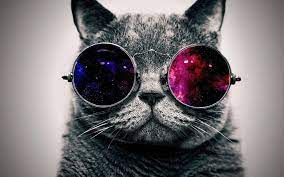

In [3]:
qt.display_pic(pic1, width=320, height=175)


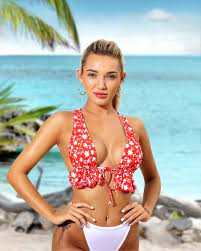

In [4]:
qt.display_pic(pic2, width=220, height=75)


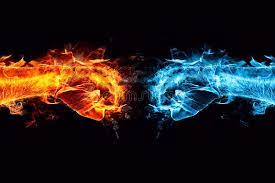

In [5]:
qt.display_pic(pic3)#, width=420, height=275)

In [6]:
qt.cs_hypothesis()


    
    **Set Hypothesis**  

    * One Tail (```<= | >```) or Two Tails (```== | !=```)?
        * two_tail (feature_1, feature_2)  


    * One Sample or Two Samples?    
        * two_sample (feature_1, feature_2)  


    * Continuous or Discreat?  
        * Discreat (feature_1) vs Discreat (feature_2) = **$Chi^2$**
            * T-Test = ```Discreat``` vs ```Continuous```  
            * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
            * $Chi^2$ = ```Discreat``` vs ```Discreat```  


    * $𝐻_0$: The opposite of what I am trying to prove  
        * $H_{0}$: feature_1 **is NOT** ```dependent``` on feature_2  
        * ```feature_1``` != ```feature_2```  


    * $𝐻_𝑎$: What am I trying to prove  
        * $H_{a}$: feature_1 **is** ```dependent``` on feature_2  
        * ```feature_1``` == ```feature_2```
        
    


**Set Hypothesis**  

* One Tail (```<= | >```) or Two Tails (```== | !=```)?
    * two_tail (gender, been_manager)  


* One Sample or Two Samples?
    * two_sample (gender, been_manager)  


* Continuous or Discreat?  
    * Discreat (gender) vs Discreat (been_manager) = **$Chi^2$**
    * T-Test = ```Discreat``` vs ```Continuous```  
    * Pearson’s = ```Continuous``` vs ```Continuous``` (linear)  
    * $Chi^2$ = ```Discreat``` vs ```Discreat```  


* $𝐻_0$: The opposite of what I am trying to prove  
    * $H_{0}$: The employee gender **is NOT** ```dependent``` on whether the employee has been a manager  
    * ```employees.gender ``` != ```employees.been_manager```  


* $𝐻_𝑎$: What am I trying to prove  
    * $H_{a}$: The employee gender **is** ```dependent``` on whether the employee has been a manager  
    * ```employees.gender ``` == ```employees.been_manager```


In [7]:
qt.cs_train_val_test()


    _______________________________________________________________  
    |                              DF                             |  
    |-------------------+-------------------+---------------------|  
    |       Train       |       Validate    |          Test       |  
    +-------------------+-------------------+-----------+---------+  
    | x_train | y_train |   x_val  |  y_val |   x_test  |  y_test |  
    +-------------------------------------------------------------+  
     
    * 1. tree_1 = DecisionTreeClassifier(max_depth = 5)  
    * 2. tree_1.fit(x_train, y_train)  
    * 3. predictions = tree_1.predict(x_train)  
    * 4. pd.crosstab(y_train, predictions)  
    * 5. val_predictions = tree_1.predict(x_val)  
    * 6. pd.crosstab(y_val, val_predictions)  

    


In [8]:
qt.cs_confusion_matrix()


    
    POSITIVE (+) = insert Positive statement here  
    NEGATIVE (-) = insert Negative statement here    
     
    RECALL    
    TP / (TP + FN)    
    Use for less Type II errors when FN is worst outcome    
    Maximize for RECALL if Cost of FN > Cost of FP    
     
    PRECISION    
    TP / (TP + FP)    
    Use for less Type I errors when FP is worst outcome    
    Maximize for PRECISION if Cost of FP > Cost of FN    
     
    ACCURACY    
    (TP + TN)/(FP+FN+TP+TN)    
    prediction TRUE / total    
    Maximize for ACCURACY if neither RECALL or PRECISION outweigh eachother  
    
    Classification Confusion Matrix (actual_col, prediction_row)(Positive_first, Negative_second)  
                          +------------------------------------------+  
                          | actual Positive (+) | actual Negative(-) |  
    +---------------------+---------------------+--------------------+  
    |  pred Positive (+)  |     TP              |     FP (Type I)    |  
 

In [9]:
qt.cell_color()


    
    <div class="alert alert-info"> </div> - Change Cell color to BLUE
    <div class="alert alert-success"> </div> - Change Cell color to GREEN
    <div class="alert alert-warning"> </div> - Change Cell color to YELLOW
    <div class="alert alert-danger"> </div> - Change Cell color to RED
    ! (followed by terminal command) - Run terminal code in current directory
    %who - displays all assigned variables
   
    


In [10]:
acq.TOC()

get_db_url(database) - Returns a formatted string using credentials stored in local env.py file that can be passed to a pandas read_sql() function.

SQL - These datasets are pulled from the Codeup SQL database using the get_db_url function and a local env.py module
* new_titanic_df() - 
* get_titanic_df() - 
* new_iris_sql_df() - 
* get_iris_sql_df() - 
* new_telco_churn_df() - 
* get_telco_churn_df() - 
* get_store_data() - 
* wrangle_store_data() - 

Seaborn - These datasets are pulled from the seaborn library and require that it is imported as sns
* new_iris_sns_df() - 
* get_iris_sns_df() - 

GitHub - These are datasets that can be found on Github and pulled using pandas read_csv function
* get_opsd_data() - 

Codeup - These are datasets available on one of the Codeup servers as a csv file.
* get_SAAS() - Read in saas data from cache or Codeup server then write to cache




In [11]:
%who

acq	 exp	 mod	 pic1	 pic2	 pic3	 prep	 qt	 sys	 
url	 viz	 w	 


In [12]:
qt.imports()


    # ---------------- #
    # Common Libraries #
    # ---------------- #
      
    # Standard Imports
    import os
    import requests
    import numpy as np
    import pandas as pd

    # Working with Dates & Times
    from sklearn.model_selection import TimeSeriesSplit
    from datetime import timedelta, datetime

    # Working with Math & Stats
    import statsmodels.api as sm
    import scipy.stats as stats

    # to evaluate performance using rmse
    from sklearn.metrics import mean_squared_error
    from math import sqrt 

    # holt's linear trend model. 
    from statsmodels.tsa.api import Holt

    # Plots, Graphs, & Visualization
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.ticker import StrMethodFormatter
    from matplotlib.dates import DateFormatter

    # plotting defaults
    plt.rc('figure', figsize=(13, 7))
    plt.style.use('seaborn-whitegrid')
    plt.rc('font', size=16)

    

    # --------- #
    # Data Sets #
    # -----

# Imports

In [13]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
from xml.etree import ElementTree

import matplotlib.pyplot as plt
# Only works inside notebook
%matplotlib inline 
#import matplotlib as mpl
#mpl.rcParams['agg.path.chunksize'] = 10000 # assists with processor speed

# import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer

from sklearn.neighbors import KNeighborsClassifier

# import helper files from local environment
from env import user, password, host
import QMCBT_01_wrangle as w
import QMCBT_02_explore as explore
import QMCBT_03_model as model

# allows import reload without needing to clear kernel and rerun
from importlib import reload
# reload(packagename) 

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Left Align Tables in Jupyter Notebook
from IPython.core.display import HTML
table_css = 'table {align:left;display:block}'
HTML('<style>{}</style>'.format(table_css))

<div class="alert alert-success">

# TX Hate Crimes (by Victim Type)
* https://crime-data-explorer.fr.cloud.gov/pages/docApi
* https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/VICTIM_TYPE?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [15]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/VICTIM_TYPE?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
response = requests.get(url)
response

<Response [200]>

In [16]:
response.ok

True

In [17]:
response.text

'{\n  "ui_type" : "basic_table",\n  "noun" : "Victim",\n  "category" : "Victim demographic",\n  "title" : "Victim Type",\n  "short_title" : "Victim Type",\n  "ui_restriction" : null,\n  "keys" : [ "Other", "Business", "Religious Organization", "Financial Institution", "Society/Public", "Individual", "Unknown", "Government", "Law Enforcement Officer" ],\n  "data" : [ {\n    "value" : 26,\n    "data_year" : 1993,\n    "month_num" : 0,\n    "key" : "Other"\n  }, {\n    "value" : 0,\n    "data_year" : 2011,\n    "month_num" : 0,\n    "key" : "Other"\n  }, {\n    "value" : 0,\n    "data_year" : 2010,\n    "month_num" : 0,\n    "key" : "Other"\n  }, {\n    "value" : 0,\n    "data_year" : 2002,\n    "month_num" : 0,\n    "key" : "Other"\n  }, {\n    "value" : 1,\n    "data_year" : 2000,\n    "month_num" : 0,\n    "key" : "Other"\n  }, {\n    "value" : 0,\n    "data_year" : 2008,\n    "month_num" : 0,\n    "key" : "Other"\n  }, {\n    "value" : 0,\n    "data_year" : 2001,\n    "month_num" : 0,

In [18]:
data = response.json()
print(type(data))
data

<class 'dict'>


{'ui_type': 'basic_table',
 'noun': 'Victim',
 'category': 'Victim demographic',
 'title': 'Victim Type',
 'short_title': 'Victim Type',
 'ui_restriction': None,
 'keys': ['Other',
  'Business',
  'Religious Organization',
  'Financial Institution',
  'Society/Public',
  'Individual',
  'Unknown',
  'Government',
  'Law Enforcement Officer'],
 'data': [{'value': 26, 'data_year': 1993, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2011, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2010, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2002, 'month_num': 0, 'key': 'Other'},
  {'value': 1, 'data_year': 2000, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2008, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2001, 'month_num': 0, 'key': 'Other'},
  {'value': 1, 'data_year': 2009, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2012, 'month_num': 0, 'key': 'Other'},
  {'value': 11, 'data_year': 1998, 'month_n

In [19]:
response = requests.get(url)
print(response)
response.json()

<Response [200]>


{'ui_type': 'basic_table',
 'noun': 'Victim',
 'category': 'Victim demographic',
 'title': 'Victim Type',
 'short_title': 'Victim Type',
 'ui_restriction': None,
 'keys': ['Other',
  'Business',
  'Religious Organization',
  'Financial Institution',
  'Society/Public',
  'Individual',
  'Unknown',
  'Government',
  'Law Enforcement Officer'],
 'data': [{'value': 26, 'data_year': 1993, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2011, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2010, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2002, 'month_num': 0, 'key': 'Other'},
  {'value': 1, 'data_year': 2000, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2008, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2001, 'month_num': 0, 'key': 'Other'},
  {'value': 1, 'data_year': 2009, 'month_num': 0, 'key': 'Other'},
  {'value': 0, 'data_year': 2012, 'month_num': 0, 'key': 'Other'},
  {'value': 11, 'data_year': 1998, 'month_n

In [20]:
response = requests.get(url)
data = response.json()
data.keys()

dict_keys(['ui_type', 'noun', 'category', 'title', 'short_title', 'ui_restriction', 'keys', 'data', 'precise_data'])

In [21]:
# Pull it all at once
response = requests.get(url)
data = response.json()

TX_hate_crimes_victim_df = pd.DataFrame(data['data'])
TX_hate_crimes_victim_df

,value,data_year,month_num,key
0,26,1993,0,Other
1,0,2011,0,Other
2,0,2010,0,Other
3,0,2002,0,Other
4,1,2000,0,Other
...,...,...,...,...
238,0,1992,0,Law Enforcement Officer
239,0,1994,0,Law Enforcement Officer
240,0,1996,0,Law Enforcement Officer
241,0,2016,0,Law Enforcement Officer


In [22]:
TX_hate_crimes_victim_df.key.unique()

array(['Other', 'Business', 'Religious Organization',
       'Financial Institution', 'Society/Public', 'Individual', 'Unknown',
       'Government', 'Law Enforcement Officer'], dtype=object)

<div class="alert alert-success">

# TX Hate Crimes (by location)
* https://crime-data-explorer.fr.cloud.gov/pages/docApi
* https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [23]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/hatecrime/states/TX/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'
response = requests.get(url)
response

<Response [200]>

In [24]:
response.ok

True

In [25]:
response.text

'{\n  "ui_type" : "basic_table",\n  "noun" : "offense",\n  "category" : "Location characteristics",\n  "title" : "Location Type",\n  "short_title" : null,\n  "ui_restriction" : null,\n  "keys" : [ "Residence Home", "Parking Garage/Lot", "Abandoned Condemned/Structure", "Air/Bus/Train Terminal", "Amusement Park", "Arena/Stadium/Fairgrounds", "ATM Separate From Bank", "Auto Dealership", "Bank", "Bar/Nightclub", "Campground", "Church/Synagogue/Temple/Mosque", "Commercial/Office Building", "Community Center", "Construction Site", "Cyberspace", "Daycare Facility", "Department/Discount Store", "Dock/Wharf/Shipping Terminal", "Drug Store/Doctors Office/Hospital", "Farm Facility", "Field/Woods", "Gambling Facility/Casino/Race Track", "Government/Public Building", "Grocery Store", "Highway/Alley/Street/Sidewalk", "Hotel/Motel", "Industrial Site", "Jail/Prison/Corrections Facility", "Lake/Waterway/Beach", "Liquor Store", "Military Base", "Unknown", "Park/Playground", "Rental Storage Facility", "

In [26]:
data = response.json()
print(type(data))
data

<class 'dict'>


{'ui_type': 'basic_table',
 'noun': 'offense',
 'category': 'Location characteristics',
 'title': 'Location Type',
 'short_title': None,
 'ui_restriction': None,
 'keys': ['Residence Home',
  'Parking Garage/Lot',
  'Abandoned Condemned/Structure',
  'Air/Bus/Train Terminal',
  'Amusement Park',
  'Arena/Stadium/Fairgrounds',
  'ATM Separate From Bank',
  'Auto Dealership',
  'Bank',
  'Bar/Nightclub',
  'Campground',
  'Church/Synagogue/Temple/Mosque',
  'Commercial/Office Building',
  'Community Center',
  'Construction Site',
  'Cyberspace',
  'Daycare Facility',
  'Department/Discount Store',
  'Dock/Wharf/Shipping Terminal',
  'Drug Store/Doctors Office/Hospital',
  'Farm Facility',
  'Field/Woods',
  'Gambling Facility/Casino/Race Track',
  'Government/Public Building',
  'Grocery Store',
  'Highway/Alley/Street/Sidewalk',
  'Hotel/Motel',
  'Industrial Site',
  'Jail/Prison/Corrections Facility',
  'Lake/Waterway/Beach',
  'Liquor Store',
  'Military Base',
  'Unknown',
  'Park/

In [27]:
response = requests.get(url)
print(response)
response.json()

<Response [200]>


{'ui_type': 'basic_table',
 'noun': 'offense',
 'category': 'Location characteristics',
 'title': 'Location Type',
 'short_title': None,
 'ui_restriction': None,
 'keys': ['Residence Home',
  'Parking Garage/Lot',
  'Abandoned Condemned/Structure',
  'Air/Bus/Train Terminal',
  'Amusement Park',
  'Arena/Stadium/Fairgrounds',
  'ATM Separate From Bank',
  'Auto Dealership',
  'Bank',
  'Bar/Nightclub',
  'Campground',
  'Church/Synagogue/Temple/Mosque',
  'Commercial/Office Building',
  'Community Center',
  'Construction Site',
  'Cyberspace',
  'Daycare Facility',
  'Department/Discount Store',
  'Dock/Wharf/Shipping Terminal',
  'Drug Store/Doctors Office/Hospital',
  'Farm Facility',
  'Field/Woods',
  'Gambling Facility/Casino/Race Track',
  'Government/Public Building',
  'Grocery Store',
  'Highway/Alley/Street/Sidewalk',
  'Hotel/Motel',
  'Industrial Site',
  'Jail/Prison/Corrections Facility',
  'Lake/Waterway/Beach',
  'Liquor Store',
  'Military Base',
  'Unknown',
  'Park/

In [28]:
response = requests.get(url)
data = response.json()
data.keys()

dict_keys(['ui_type', 'noun', 'category', 'title', 'short_title', 'ui_restriction', 'keys', 'data', 'precise_data'])

In [29]:
ui_type = data['ui_type']
noun = data['noun']
category = data['category']
title = data['title']
short_title = data['short_title']
ui_restriction = data['ui_restriction']
api_keys_column = data['keys']
api_data_column = data['data']


print(f'ui_type: {ui_type}')
print(f'noun: {noun}')
print(f'category: {category}')
print(f'title: {title}')
print(f'short_title: {short_title}')
print(f'ui_restriction: {ui_restriction}')
print(f'api_keys_column: {api_keys_column}')
print(f'api_data_column: {api_data_column}')


ui_type: basic_table
noun: offense
category: Location characteristics
title: Location Type
short_title: None
ui_restriction: None
api_keys_column: ['Residence Home', 'Parking Garage/Lot', 'Abandoned Condemned/Structure', 'Air/Bus/Train Terminal', 'Amusement Park', 'Arena/Stadium/Fairgrounds', 'ATM Separate From Bank', 'Auto Dealership', 'Bank', 'Bar/Nightclub', 'Campground', 'Church/Synagogue/Temple/Mosque', 'Commercial/Office Building', 'Community Center', 'Construction Site', 'Cyberspace', 'Daycare Facility', 'Department/Discount Store', 'Dock/Wharf/Shipping Terminal', 'Drug Store/Doctors Office/Hospital', 'Farm Facility', 'Field/Woods', 'Gambling Facility/Casino/Race Track', 'Government/Public Building', 'Grocery Store', 'Highway/Alley/Street/Sidewalk', 'Hotel/Motel', 'Industrial Site', 'Jail/Prison/Corrections Facility', 'Lake/Waterway/Beach', 'Liquor Store', 'Military Base', 'Unknown', 'Park/Playground', 'Rental Storage Facility', 'Rest Area', 'Restaurant', 'School/College', 'Scho

In [30]:
import pandas as pd
df = pd.DataFrame(data['data'])
df

,value,data_year,month_num,key
0,165,1993,0,Residence Home
1,63,2010,0,Residence Home
2,136,2002,0,Residence Home
3,144,2001,0,Residence Home
4,65,2009,0,Residence Home
...,...,...,...,...
1237,5,2008,0,Convenience Store
1238,3,1991,0,Convenience Store
1239,11,1992,0,Convenience Store
1240,6,2004,0,Convenience Store


In [31]:
df.month_num.unique()

array([0])

In [32]:
df.data_year.unique()

array([1993, 2010, 2002, 2001, 2009, 2012, 2000, 1998, 2014, 2015, 2017,
       1997, 2005, 2007, 2003, 2011, 2006, 1995, 1999, 2013, 1994, 2016,
       2008, 1991, 1992, 2004, 1996])

In [33]:
df.data_year.value_counts()

1993    46
2003    46
2004    46
1992    46
1991    46
2008    46
2016    46
1994    46
2013    46
1999    46
1995    46
2006    46
2011    46
2007    46
2010    46
2005    46
1997    46
2017    46
2015    46
2014    46
1998    46
2000    46
2012    46
2009    46
2001    46
2002    46
1996    46
Name: data_year, dtype: int64

In [34]:
df.value.unique()

array([165,  63, 136, 144,  65,  67,  99, 106,  51,  66, 129, 103, 104,
       118,  75,  91, 120,  47, 148,  79, 102,  28, 173, 111, 137,  34,
        18,  57,  60,  25,  23,  38,  29,  17,  26,  41,  31,   8,  20,
        32,  14,  42,  36,  45,   0,   1,   4,   2,   3,   7,   6,   9,
         5,  10,  19,  11,  16,  13,  12, 119,  73,  82,  24,  78,  58,
        62,  27,  55,  81,  64, 105, 115,  59,  74,  15,  22,  21])

In [35]:
df.isnull().sum()

value        0
data_year    0
month_num    0
key          0
dtype: int64

In [36]:
# Pull it all at once
response = requests.get(url)
data = response.json()

TX_hate_crimes_df = pd.DataFrame(data['data'])
TX_hate_crimes_df

,value,data_year,month_num,key
0,165,1993,0,Residence Home
1,63,2010,0,Residence Home
2,136,2002,0,Residence Home
3,144,2001,0,Residence Home
4,65,2009,0,Residence Home
...,...,...,...,...
1237,5,2008,0,Convenience Store
1238,3,1991,0,Convenience Store
1239,11,1992,0,Convenience Store
1240,6,2004,0,Convenience Store


<div class="alert alert-success">

# National Hate Crimes (by Location)
* https://crime-data-explorer.fr.cloud.gov/pages/docApi
* https://api.usa.gov/crime/fbi/sapi/api/hatecrime/national/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv

In [37]:
url = 'https://api.usa.gov/crime/fbi/sapi/api/hatecrime/national/all/LOCATION?API_KEY=iiHnOKfno2Mgkt5AynpvPpUQTEyxE77jo1RU8PIv'

In [38]:
response = requests.get(url)
response

<Response [200]>

In [39]:
response.ok

True

In [40]:
response.status_code

200

In [41]:
response.text

'{\n  "ui_type" : "basic_table",\n  "noun" : "offense",\n  "category" : "Location characteristics",\n  "title" : "Location Type",\n  "short_title" : null,\n  "ui_restriction" : null,\n  "keys" : [ "Residence Home", "Parking Garage/Lot", "Abandoned Condemned/Structure", "Air/Bus/Train Terminal", "Amusement Park", "Arena/Stadium/Fairgrounds", "ATM Separate From Bank", "Auto Dealership", "Bank", "Bar/Nightclub", "Campground", "Church/Synagogue/Temple/Mosque", "Commercial/Office Building", "Community Center", "Construction Site", "Cyberspace", "Daycare Facility", "Department/Discount Store", "Dock/Wharf/Shipping Terminal", "Drug Store/Doctors Office/Hospital", "Farm Facility", "Field/Woods", "Gambling Facility/Casino/Race Track", "Government/Public Building", "Grocery Store", "Highway/Alley/Street/Sidewalk", "Hotel/Motel", "Industrial Site", "Jail/Prison/Corrections Facility", "Lake/Waterway/Beach", "Liquor Store", "Military Base", "Unknown", "Park/Playground", "Rental Storage Facility", "

In [42]:
data = response.json()
print(type(data))
data

<class 'dict'>


{'ui_type': 'basic_table',
 'noun': 'offense',
 'category': 'Location characteristics',
 'title': 'Location Type',
 'short_title': None,
 'ui_restriction': None,
 'keys': ['Residence Home',
  'Parking Garage/Lot',
  'Abandoned Condemned/Structure',
  'Air/Bus/Train Terminal',
  'Amusement Park',
  'Arena/Stadium/Fairgrounds',
  'ATM Separate From Bank',
  'Auto Dealership',
  'Bank',
  'Bar/Nightclub',
  'Campground',
  'Church/Synagogue/Temple/Mosque',
  'Commercial/Office Building',
  'Community Center',
  'Construction Site',
  'Cyberspace',
  'Daycare Facility',
  'Department/Discount Store',
  'Dock/Wharf/Shipping Terminal',
  'Drug Store/Doctors Office/Hospital',
  'Farm Facility',
  'Field/Woods',
  'Gambling Facility/Casino/Race Track',
  'Government/Public Building',
  'Grocery Store',
  'Highway/Alley/Street/Sidewalk',
  'Hotel/Motel',
  'Industrial Site',
  'Jail/Prison/Corrections Facility',
  'Lake/Waterway/Beach',
  'Liquor Store',
  'Military Base',
  'Unknown',
  'Park/

In [43]:
response = requests.get(url)
print(response)
response.json()

<Response [200]>


{'ui_type': 'basic_table',
 'noun': 'offense',
 'category': 'Location characteristics',
 'title': 'Location Type',
 'short_title': None,
 'ui_restriction': None,
 'keys': ['Residence Home',
  'Parking Garage/Lot',
  'Abandoned Condemned/Structure',
  'Air/Bus/Train Terminal',
  'Amusement Park',
  'Arena/Stadium/Fairgrounds',
  'ATM Separate From Bank',
  'Auto Dealership',
  'Bank',
  'Bar/Nightclub',
  'Campground',
  'Church/Synagogue/Temple/Mosque',
  'Commercial/Office Building',
  'Community Center',
  'Construction Site',
  'Cyberspace',
  'Daycare Facility',
  'Department/Discount Store',
  'Dock/Wharf/Shipping Terminal',
  'Drug Store/Doctors Office/Hospital',
  'Farm Facility',
  'Field/Woods',
  'Gambling Facility/Casino/Race Track',
  'Government/Public Building',
  'Grocery Store',
  'Highway/Alley/Street/Sidewalk',
  'Hotel/Motel',
  'Industrial Site',
  'Jail/Prison/Corrections Facility',
  'Lake/Waterway/Beach',
  'Liquor Store',
  'Military Base',
  'Unknown',
  'Park/

In [44]:
response = requests.get(url)

data = response.json()
data.keys()

dict_keys(['ui_type', 'noun', 'category', 'title', 'short_title', 'ui_restriction', 'keys', 'data', 'precise_data'])

In [45]:
# Pull it all at once
response = requests.get(url)
data = response.json()

national_hate_crimes_df = pd.DataFrame(data['data'])
national_hate_crimes_df

,value,data_year,month_num,key
0,1915,2015,0,Residence Home
1,2374,1999,0,Residence Home
2,2679,2008,0,Residence Home
3,2315,2005,0,Residence Home
4,2909,1996,0,Residence Home
...,...,...,...,...
1237,103,2003,0,Convenience Store
1238,67,2009,0,Convenience Store
1239,94,2006,0,Convenience Store
1240,58,1991,0,Convenience Store


<div class="alert alert-success">

# Life Expectancy
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000002,WHOSIS_000003,WHOSIS_000004,WHOSIS_000005,WHOSIS_000006,WHOSIS_000007,WHOSIS_000008,WHOSIS_000009,WHOSIS_000010,WHOSIS_000012,WHOSIS_000013,WHOSIS_000014,WHOSIS_000015,WHOSIS_000016?format=csv

In [46]:
life_Expectancy_df = pd.read_csv('../../my_notes/smoking_WHOSIS000001-16.csv')

In [47]:
life_Expectancy_df

,GHO,DATASOURCE,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,SEX,UNSDGREGION,Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,WHOSIS_000004,NaN,PUBLISHED,2000,AFR,NaN,NaN,FMLE,NaN,371,371.42360,NaN,NaN,NaN,NaN,NaN
1,WHOSIS_000004,NaN,PUBLISHED,2001,AFR,NaN,NaN,MLE,NaN,422,421.53050,NaN,NaN,NaN,NaN,NaN
2,WHOSIS_000004,NaN,PUBLISHED,2003,AFR,NaN,NaN,FMLE,NaN,379,378.79310,NaN,NaN,NaN,NaN,NaN
3,WHOSIS_000004,NaN,PUBLISHED,2004,AFR,NaN,NaN,MLE,NaN,417,416.63960,NaN,NaN,NaN,NaN,NaN
4,WHOSIS_000004,NaN,PUBLISHED,2006,AFR,NaN,NaN,FMLE,NaN,356,356.15590,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39875,WHOSIS_000003,NaN,PUBLISHED,2008,AFR,NaN,ZWE,BTSX,NaN,31.19 [27.96-34.7],31.19215,27.96338,34.70319,NaN,NaN,NaN
39876,WHOSIS_000003,NaN,PUBLISHED,2015,AFR,NaN,ZWE,BTSX,NaN,27.76 [23.64-32.67],27.76433,23.63723,32.66603,NaN,NaN,NaN
39877,WHOSIS_000003,NaN,PUBLISHED,2017,AFR,NaN,ZWE,BTSX,NaN,27.01 [21.78-33.8],27.01455,21.77675,33.79541,NaN,NaN,NaN
39878,WHOSIS_000006,NUT_NGA2018DHS,PUBLISHED,2018,AFR,WB_LMI,NGA,NaN,NaN,28.7 [26.8-30.6],28.68000,26.80000,30.60000,NaN,NaN,Nigeria Demographic and Health Survey 2018. Ab...


In [48]:
life_Expectancy_df.isnull().sum()

GHO                         0
DATASOURCE              39874
PUBLISHSTATE                0
YEAR                        0
REGION                    646
WORLDBANKINCOMEGROUP    39019
COUNTRY                  1780
SEX                      4968
UNSDGREGION             39460
Display Value               0
Numeric                     0
Low                     19229
High                    19229
StdErr                  39880
StdDev                  39880
Comments                39213
dtype: int64

In [49]:
life_Expectancy_df.YEAR.unique()

array([2000, 2001, 2003, 2004, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2014, 2015, 2002, 2005, 2013, 2016, 2018, 2017, 2019, 1990, 1996,
       1987, 1999, 1993, 1995, 1988, 1994, 1989, 1997, 2020, 1992, 1998,
       1991, 1986, 1979, 1981, 1971, 1978, 1980, 1985, 1977, 1984, 1975,
       1972, 1974, 1983, 1956, 1958, 1965, 1967, 1976, 1970, 1961, 1968,
       1964, 1966, 1973, 1982, 1960, 1962, 1963, 1969, 1959, 1955, 1952,
       1954, 1957, 1953, 1951])

In [50]:
life_Expectancy_df.GHO.unique()

array(['WHOSIS_000004', 'WHOSIS_000014', 'WHOSIS_000002', 'WHOSIS_000007',
       'WHOSIS_000015', 'WHOSIS_000001', 'WHOSIS_000006', 'WHOSIS_000016',
       'WHOSIS_000003'], dtype=object)

In [51]:
life_Expectancy_df.GHO.isnull().sum()

0

In [52]:
life_Expectancy_df.GHO.value_counts()

WHOSIS_000004    9690
WHOSIS_000003    9648
WHOSIS_000016    6262
WHOSIS_000014    4353
WHOSIS_000002    2328
WHOSIS_000007    2328
WHOSIS_000015    2328
WHOSIS_000001    2328
WHOSIS_000006     615
Name: GHO, dtype: int64

In [53]:
life_Expectancy_df.shape[0]

39880

In [54]:
print(f'WHOSIS_000004    {round(9690/39880*100,2)}%')
print(f'WHOSIS_000003    {round(9648/39880*100,2)}%')
print(f'WHOSIS_000016     {round(6262/39880*100,2)}%')
print(f'WHOSIS_000014     {round(4353/39880*100,2)}%')
print(f'WHOSIS_000002     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000007     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000015     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000001     {round(2328/39880*100,2)}%')
print(f'WHOSIS_000006     {round(615/39880*100,2)}%')

WHOSIS_000004    24.3%
WHOSIS_000003    24.19%
WHOSIS_000016     15.7%
WHOSIS_000014     10.92%
WHOSIS_000002     5.84%
WHOSIS_000007     5.84%
WHOSIS_000015     5.84%
WHOSIS_000001     5.84%
WHOSIS_000006     1.54%


<div class="alert alert-info">

#### About 24% of data
* 'WHOSIS_000004': 'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)',
* 'WHOSIS_000003': 'Neonatal mortality rate (0 to 27 days) per 1000 live births)',

#### Between 10-15% of data
* 'WHOSIS_000016': 'Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)', 
* 'WHOSIS_000014': 'Stillbirth rate (per 1000 total births)', 

#### These are all exactly the same record count at 5.84%
* 'WHOSIS_000001': 'Life expectancy at birth (years)', 
* 'WHOSIS_000002': 'Healthy life expectancy (HALE) at birth (years)', 
* 'WHOSIS_000007': 'Healthy life expectancy (HALE) at age 60 (years)', 
* 'WHOSIS_000015': 'Life expectancy at age 60 (years)', 

#### Very little representation at only 1.54% with just 615 records
* 'WHOSIS_000006': 'Infants exclusively breastfed for the first six months of life (%)', 

'WHOSIS_000001': 'Life expectancy at birth (years)', 
'WHOSIS_000002': 'Healthy life expectancy (HALE) at birth (years)', 
'WHOSIS_000003': 'Neonatal mortality rate (0 to 27 days) per 1000 live births) (SDG 3.2.2)',
'WHOSIS_000004': 'Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)',
'WHOSIS_000006': 'Infants exclusively breastfed for the first six months of life (%)', 
'WHOSIS_000007': 'Healthy life expectancy (HALE) at age 60 (years)', 
'WHOSIS_000014': 'Stillbirth rate (per 1000 total births)', 
'WHOSIS_000015': 'Life expectancy at age 60 (years)', 
'WHOSIS_000016': 'Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)', 

|[GHO Code](https://apps.who.int/gho/athena/api/GHO)      |[Documentation](https://www.who.int/data/gho/indicator-metadata-registry)|[Global Health Observatory](https://www.who.int/data/gho) (GHO) Code Description|
|:-------------|:-----------:|:------------------------------------------------|
|WHOSIS_000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/65)|Life expectancy at birth (years)| 
|WHOSIS_000002|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/66)|Healthy life expectancy (HALE) at birth (years)| 
|WHOSIS_000003|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/67)|Neonatal mortality rate (0 to 27 days) per 1000 live births)|
|WHOSIS_000004|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/64)|Adult mortality rate (probability of dying between 15 and 60 years per 1000 population)|
|WHOSIS_000006|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/130)|Infants exclusively breastfed for the first six months of life (%)| 
|WHOSIS_000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/3443)|Healthy life expectancy (HALE) at age 60 (years)| 
|WHOSIS_000014|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2444)|Stillbirth rate (per 1000 total births)| 
|WHOSIS_000015|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2977)|Life expectancy at age 60 (years)| 
|WHOSIS_000016|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/5669)|Mortality rate among children ages 5 to 9 years (per 1000 children aged 5)| 


In [55]:
life_Expectancy_df.PUBLISHSTATE.unique()

array(['PUBLISHED'], dtype=object)

In [56]:
life_Expectancy_df.Numeric.unique()

array([371.4236 , 421.5305 , 378.7931 , ...,  27.01455,  28.68   ,
        47.84   ])

In [57]:
life_Expectancy_df.COUNTRY.nunique()

195

In [58]:
life_Expectancy_df.COUNTRY.unique()

array([nan, 'AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS',
       'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA',
       'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI',
       'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH',
       'FIN', 'FJI', 'FRA', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN',
       'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HND', 'HRV',
       'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR',
       'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR',
       'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO',
       'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MKD',
       'MLI', 'MLT', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI',
       'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL',
       'OMN', '

In [59]:
life_Expectancy_df.COUNTRY.isnull().sum()

1780

In [60]:
life_Expectancy_df.COUNTRY.isnull().sum() / life_Expectancy_df.shape[0]

0.044633901705115345

In [61]:
life_Expectancy_df.SEX.isnull().sum()

4968

In [62]:
life_Expectancy_df.SEX.isnull().sum() / life_Expectancy_df.shape[0]

0.12457372116349047

In [63]:
life_expectancy_df = life_Expectancy_df[(life_Expectancy_df['GHO'] == 'WHOSIS_000001') |
                                (life_Expectancy_df['GHO'] == 'WHOSIS_000002') |
                                (life_Expectancy_df['GHO'] == 'WHOSIS_000007') |
                                (life_Expectancy_df['GHO'] == 'WHOSIS_000015')
                               ]

In [64]:
life_expectancy_df

,GHO,DATASOURCE,PUBLISHSTATE,YEAR,REGION,WORLDBANKINCOMEGROUP,COUNTRY,SEX,UNSDGREGION,Display Value,Numeric,Low,High,StdErr,StdDev,Comments
13331,WHOSIS_000002,NaN,PUBLISHED,2000,EMR,NaN,AFG,MLE,NaN,46.9,46.93113,NaN,NaN,NaN,NaN,NaN
13332,WHOSIS_000007,NaN,PUBLISHED,2000,EMR,NaN,AFG,MLE,NaN,10.2,10.22541,NaN,NaN,NaN,NaN,NaN
13333,WHOSIS_000015,NaN,PUBLISHED,2015,EMR,NaN,AFG,MLE,NaN,15.7,15.67539,NaN,NaN,NaN,NaN,NaN
13334,WHOSIS_000001,NaN,PUBLISHED,2019,EMR,NaN,AFG,MLE,NaN,63.3,63.28709,NaN,NaN,NaN,NaN,NaN
13335,WHOSIS_000007,NaN,PUBLISHED,2000,EMR,NaN,AFG,FMLE,NaN,10.1,10.11293,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24246,WHOSIS_000015,NaN,PUBLISHED,2019,GLOBAL,WB_WORLD_INCOME,NaN,FMLE,NaN,22.7,22.67449,NaN,NaN,NaN,NaN,NaN
24247,WHOSIS_000001,NaN,PUBLISHED,2000,GLOBAL,WB_WORLD_INCOME,NaN,BTSX,NaN,66.8,66.79430,NaN,NaN,NaN,NaN,NaN
24248,WHOSIS_000015,NaN,PUBLISHED,2000,GLOBAL,WB_WORLD_INCOME,NaN,BTSX,NaN,18.8,18.83003,NaN,NaN,NaN,NaN,NaN
24249,WHOSIS_000007,NaN,PUBLISHED,2010,GLOBAL,WB_WORLD_INCOME,NaN,BTSX,NaN,15.1,15.08183,NaN,NaN,NaN,NaN,NaN


In [65]:
life_expectancy_df.GHO.unique()

array(['WHOSIS_000002', 'WHOSIS_000007', 'WHOSIS_000015', 'WHOSIS_000001'],
      dtype=object)

<div class="alert alert-success">

# Infant Mortality
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/MDG_0000000001,MDG_0000000003,MDG_0000000005,MDG_0000000007,MDG_0000000025,MDG_0000000026?format=csv

In [67]:
infant_mortality_df = pd.read_csv('../../my_notes/infant_mortality.csv')

In [68]:
infant_mortality_df

,GHO,PUBLISHSTATE,YEAR,REGION,UNREGION,COUNTRY,AGEGROUP,SEX,Display Value,Numeric,Low,High,StdErr,StdDev,Comments
0,MDG_0000000026,PUBLISHED,2004,AFR,NaN,SLE,NaN,NaN,1 850 [ 1 480 - 2 330 ],1850.00000,1480.0,2330.0,NaN,NaN,NaN
1,MDG_0000000026,PUBLISHED,2000,AFR,NaN,SSD,NaN,NaN,1 730 [ 1 320 - 2 250 ],1730.00000,1320.0,2250.0,NaN,NaN,NaN
2,MDG_0000000026,PUBLISHED,2005,AFR,NaN,SLE,NaN,NaN,1 760 [ 1 410 - 2 220 ],1760.00000,1410.0,2220.0,NaN,NaN,NaN
3,MDG_0000000026,PUBLISHED,2001,AFR,NaN,SSD,NaN,NaN,1 690 [ 1 310 - 2 190 ],1690.00000,1310.0,2190.0,NaN,NaN,NaN
4,MDG_0000000026,PUBLISHED,2002,AFR,NaN,CAF,NaN,NaN,1 280 [ 872 - 1 880 ],1280.00000,872.0,1880.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82930,MDG_0000000003,PUBLISHED,2010-2015,EMR,NaN,NaN,YEARS15-19,FMLE,50.4,50.38059,NaN,NaN,NaN,NaN,World population prospects: 2019 revision. Uni...
82931,MDG_0000000003,PUBLISHED,2000-2005,WPR,NaN,NaN,YEARS15-19,FMLE,13.4,13.35170,NaN,NaN,NaN,NaN,World population prospects: 2019 revision. Uni...
82932,MDG_0000000003,PUBLISHED,2010-2015,WPR,NaN,NaN,YEARS15-19,FMLE,14.4,14.37810,NaN,NaN,NaN,NaN,World population prospects: 2019 revision. Uni...
82933,MDG_0000000025,PUBLISHED,2001-2007,GLOBAL,NaN,NaN,NaN,NaN,64.1,64.12033,NaN,NaN,NaN,NaN,UNICEF/WHO joint global database on Skilled at...


In [69]:
infant_mortality_df.isnull().sum()

GHO                  0
PUBLISHSTATE         0
YEAR                 0
REGION             154
UNREGION         82781
COUNTRY           1631
AGEGROUP         77590
SEX               5573
Display Value        0
Numeric              0
Low               7498
High              7498
StdErr           82935
StdDev           82935
Comments         75437
dtype: int64

In [70]:
infant_mortality_df.YEAR.unique()

array([2004, 2000, 2005, 2001, 2002, 2003, 2010, 2007, 2011, 2013, 2012,
       2015, 2009, 2014, 2016, 2006, 2008, 2017, 1990, 1991, 1993, 1994,
       1996, 1997, 1998, 1999, 2018, 2019, 1992, 1995, 2020, 1955, 1956,
       1957, 1958, 1959, 1961, 1962, 1964, 1965, 1967, 1970, 1973, 1975,
       1976, 1978, 1979, 1981, 1982, 1983, 1984, 1986, 1987, 1989, 1951,
       1952, 1954, 1960, 1963, 1966, 1968, 1969, 1971, 1972, 1974, 1977,
       1980, 1985, 1988, 1953, 1950, 1949, 1940, 1942, 1947, 1946, 1948,
       1945, 1943, 1944, 1935, 1936, 1937, 1938, 1941, 1939, 1934, 1933,
       1932, '1998', '2000', '2001', '2003', '2004', '2006', '2007',
       '2008', '2009', '2011', '2012', '2014', '2015', '2017', '2020',
       '1953', '1955', '1956', '1958', '1959', '1961', '1962', '1963',
       '1964', '1966', '1967', '1969', '1970', '1972', '1975', '1978',
       '1980', '1981', '1983', '1984', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1994', '1995', '1997', '2016', 

In [71]:
infant_mortality_df.GHO.unique()

array(['MDG_0000000026', 'MDG_0000000001', 'MDG_0000000007',
       'MDG_0000000003', 'MDG_0000000025'], dtype=object)

In [72]:
infant_mortality_df.GHO.isnull().sum()

0

In [73]:
infant_mortality_df.GHO.value_counts()

MDG_0000000007    36084
MDG_0000000001    35933
MDG_0000000003     5345
MDG_0000000026     3420
MDG_0000000025     2153
Name: GHO, dtype: int64

In [74]:
infant_mortality_df.shape[0]

82935

In [75]:
print(f'MDG_0000000007    {round(36084/82935*100,2)}%')
print(f'MDG_0000000001    {round(35933/82935*100,2)}%')
print(f'MDG_0000000003     {round(5345/82935*100,2)}%')
print(f'MDG_0000000026     {round(3420/82935*100,2)}%')
print(f'MDG_0000000025     {round(2153/82935*100,2)}%')

MDG_0000000007    43.51%
MDG_0000000001    43.33%
MDG_0000000003     6.44%
MDG_0000000026     4.12%
MDG_0000000025     2.6%


<div class="alert alert-info">

#### Over 35K value counts
* 'MDG_0000000007': 'Under-five mortality rate (per 1000 live births)', 
* 'MDG_0000000001': 'Infant mortality rate (between birth and 11 months per 1000 live births)', 

#### Between 2-5k value counts
* 'MDG_0000000003': 'Adolescent birth rate (per 1000 women)', 
* 'MDG_0000000026': 'Maternal mortality ratio (per 100 000 live births)', 
* 'MDG_0000000025': 'Births attended by skilled health personnel (%)', 

#### MDG...05 returned no data
* 'MDG_0000000005': 'Contraceptive prevalence (%)', 

'MDG_0000000001': 'Infant mortality rate (between birth and 11 months per 1000 live births)', 
'MDG_0000000003': 'Adolescent birth rate (per 1000 women)', 
'MDG_0000000005': 'Contraceptive prevalence (%)', 
'MDG_0000000007': 'Under-five mortality rate (per 1000 live births)', 
'MDG_0000000025': 'Births attended by skilled health personnel (%)', 
'MDG_0000000026': 'Maternal mortality ratio (per 100 000 live births)', 

|[GHO Code](https://apps.who.int/gho/athena/api/GHO)      |[Documentation](https://www.who.int/data/gho/indicator-metadata-registry)|[Global Health Observatory](https://www.who.int/data/gho) (GHO) Code Description|
|:-------------|:-----------:|:------------------------------------------------|
|MDG_0000000001|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/1)|Infant mortality rate (between birth and 11 months per 1000 live births)| 
|MDG_0000000003|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/4669)|Adolescent birth rate (per 1000 women)| 
|MDG_0000000005|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/5)|Contraceptive prevalence (%)| 
|MDG_0000000007|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/7)|Under-five mortality rate (per 1000 live births)| 
|MDG_0000000025|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/25)|Births attended by skilled health personnel (%)| 
|MDG_0000000026|[📖](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/26)|Maternal mortality ratio (per 100 000 live births)| 

In [76]:
infant_mortality_df.PUBLISHSTATE.unique()

array(['PUBLISHED'], dtype=object)

In [77]:
infant_mortality_df.Numeric.unique()

array([1850.     , 1730.     , 1760.     , ...,   14.3781 ,   64.12033,
         83.56604])

In [78]:
infant_mortality_df.COUNTRY.nunique()

195

In [79]:
infant_mortality_df.COUNTRY.unique()

array(['SLE', 'SSD', 'CAF', 'SOM', 'AFG', 'TCD', 'NGA', 'GNB', 'RWA',
       'GIN', 'MRT', 'LBR', 'GMB', 'ETH', 'TLS', 'NER', 'TZA', 'MLI',
       'CIV', 'BDI', 'DJI', 'KEN', 'COG', 'LSO', 'ERI', 'MWI', 'SWZ',
       'COD', 'CMR', 'ZWE', 'HTI', 'MDG', 'SEN', 'NPL', 'LAO', 'BFA',
       'ZMB', 'TGO', 'AGO', 'BEN', 'SDN', 'COM', 'UGA', 'KHM', 'BGD',
       'MOZ', 'GHA', 'GNQ', 'GAB', 'PNG', 'BTN', 'NAM', 'IND', 'PAK',
       'BOL', 'SLB', 'YEM', 'IDN', 'MMR', 'BWA', 'FSM', 'PRK', 'STP',
       'VUT', 'GUY', 'MAR', 'DZA', 'ZAF', 'NIC', 'PHL', 'KIR', 'SUR',
       'IRQ', 'VEN', 'GTM', 'LCA', 'WSM', 'LBY', 'PER', 'TON', 'MNG',
       'CPV', 'ECU', 'BHS', 'SYC', 'PAN', 'VCT', 'COL', 'KGZ', 'PRY',
       'MUS', 'MDV', 'JAM', 'HND', 'TTO', 'DOM', 'SLV', 'VNM', 'BLZ',
       'ARG', 'BRA', 'ATG', 'JOR', 'ROU', 'LKA', 'RUS', 'KAZ', 'TUN',
       'FJI', 'BRB', 'MEX', 'EGY', 'CUB', 'GEO', 'THA', 'ARM', 'AZE',
       'SYR', 'CHN', 'MDA', 'UZB', 'BRN', 'TJK', 'CRI', 'MYS', 'LVA',
       'GRD', 'UKR',

In [80]:
infant_mortality_df.COUNTRY.isnull().sum()

1631

In [81]:
infant_mortality_df.COUNTRY.isnull().sum() / life_Expectancy_df.shape[0]

0.04089769307923771

In [82]:
infant_mortality_df.SEX.isnull().sum()

5573

In [83]:
infant_mortality_df.SEX.isnull().sum() / life_Expectancy_df.shape[0]

0.13974423269809427

<div class="alert alert-success">

# Life Expectancy from Online Example
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000015?format=csv
* **Online Example:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000015?filter=COUNTRY:*&x-sideaxis=COUNTRY;YEAR&x-topaxis=GHO;SEX&profile=verbose&format=csv

In [84]:
# load WHO longevity data
# http://apps.who.int/gho/data/node.main.688
who_list = pd.read_csv('online_example.csv')

In [85]:
who_list.T

,0,1,2,3,4,5,6,7,8,9,...,4382,4383,4384,4385,4386,4387,4388,4389,4390,4391
GHO (CODE),WHOSIS_000015,WHOSIS_000001,WHOSIS_000015,WHOSIS_000001,WHOSIS_000001,WHOSIS_000015,WHOSIS_000001,WHOSIS_000015,WHOSIS_000001,WHOSIS_000015,...,WHOSIS_000001,WHOSIS_000015,WHOSIS_000015,WHOSIS_000001,WHOSIS_000015,WHOSIS_000001,WHOSIS_000015,WHOSIS_000001,WHOSIS_000001,WHOSIS_000015
GHO (DISPLAY),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at birth (years),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at age 60 (years),...,Life expectancy at birth (years),Life expectancy at age 60 (years),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at age 60 (years),Life expectancy at birth (years),Life expectancy at birth (years),Life expectancy at age 60 (years)
GHO (URL),https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...,https://www.who.int/data/gho/indicator-metadat...
PUBLISHSTATE (CODE),PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,...,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED,PUBLISHED
PUBLISHSTATE (DISPLAY),Published,Published,Published,Published,Published,Published,Published,Published,Published,Published,...,Published,Published,Published,Published,Published,Published,Published,Published,Published,Published
PUBLISHSTATE (URL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR (CODE),2015,2019,2015,2019,2019,2019,2019,2019,2019,2019,...,2000,2000,2000,2010,2000,2010,2000,2010,2010,2010
YEAR (DISPLAY),2015,2019,2015,2019,2019,2019,2019,2019,2019,2019,...,2000,2000,2000,2010,2000,2010,2000,2010,2010,2010
YEAR (URL),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
REGION (CODE),EMR,EMR,EMR,EMR,EMR,EMR,AFR,AFR,AFR,AFR,...,AFR,AFR,AFR,AFR,AFR,AFR,AFR,AFR,AFR,AFR


In [86]:
who_list['YEAR (CODE)'].unique()

array([2015, 2019, 2000, 2010])

In [87]:
who_list['REGION (DISPLAY)'].unique()

array(['Eastern Mediterranean', 'Africa', 'Europe', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [88]:
who_list['COUNTRY (DISPLAY)'].nunique()

183

In [89]:
who_list['SEX (DISPLAY)'].unique()

array(['Male', 'Female', 'Both sexes'], dtype=object)

<div class="alert alert-success">

# Checkpoint #1

1. a brief (one-sentence) description of your project
* Predict future Life Expectancy or Healthy Life Expectancy

2. a link to the data source
* **GHO Selections:** https://apps.who.int/gho/athena/api/GHO
* **Homepage:** https://www.who.int/data/gho/info/athena-api-examples
* **CSV Data Pull:** https://apps.who.int/gho/athena/api/GHO/WHOSIS_000001,WHOSIS_000002,WHOSIS_000003,WHOSIS_000004,WHOSIS_000005,WHOSIS_000006,WHOSIS_000007,WHOSIS_000008,WHOSIS_000009,WHOSIS_000010,WHOSIS_000012,WHOSIS_000013,WHOSIS_000014,WHOSIS_000015,WHOSIS_000016?format=csv 

3. your target variable
* Numeric (Expected Years of continued Life)

4. what one observation represents
* Numeric for one year in specified country according to category of life expectancy
    * 'WHOSIS_000001': 'Life expectancy at birth (years)', 
    * 'WHOSIS_000002': 'Healthy life expectancy (HALE) at birth (years)', 
    * 'WHOSIS_000007': 'Healthy life expectancy (HALE) at age 60 (years)', 
    * 'WHOSIS_000015': 'Life expectancy at age 60 (years)', 


<div class="alert alert-danger">

# Sometimes it is faster to read the unreadable data than it is to read about how to make the data readable!

# Additional Web Resources on Life Expectancy
* https://towardsdatascience.com/time-left-to-live-modeling-life-expectancy-and-prototyping-it-on-the-web-with-flask-and-68e3a8fa0fe4
* https://www.freecodecamp.org/news/regression-analysis-on-life-expectancy/